In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [202]:
data=1000
batch=10
set=100
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
m2=-1
lam=1
c_reg1=0.003
c_reg2=0.0001

<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([ 0.67646795,  1.85595318,  1.65581625,  2.39219276,  1.72554186,
        2.3825013 ,  3.87244969,  4.90187826,  6.87235108, 10.8165208 ])>
tf.Tensor(
[ 3.01490951  3.02722263  3.04978824  3.09134316  3.16854751  3.31437385
  3.59861219  4.18820179  5.58607614 10.29821491], shape=(10,), dtype=float64)


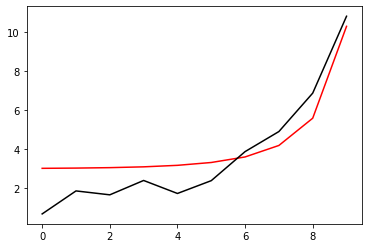

In [203]:
h=tf.zeros(layer)
h_in=[]
#h_in=[3.0205426, 3.022307 , 3.0291433, 3.04402  , 3.0732646, 3.131582 ,
# 3.2585216, 3.5762587, 4.59116  , 9.752249]
for i in range (layer):
#   midd=np.float64(10.0)
#    h_in.append(midd)
#    midd=3*coth(3*((i-layer)*dn)).numpy()
#    h_in.append(midd)
    mu=1/(1-i/10)
    h_inn=np.float64(np.random.normal(mu, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
print(h)

h_real=tf.zeros(layer)
middd=[]
for i in range (layer):
    midd=3*coth(3*((i-layer)*dn)).numpy()
    middd.append(midd)
h_real=tf.constant(middd)
print(h_real)
plt.plot(h_real, 'r-')
plt.plot(h.numpy(), 'k-')
plt.show()

In [204]:
m2=tf.constant(np.float64(-1.0))
m2_2=tf.Variable(np.float64(np.random.uniform(-1.5, -0.5)))
print(m2_2)

lam=tf.constant(np.float64(1.0))
lam2=tf.Variable(np.float64(np.random.uniform(0.5, 1.5)))
print(lam2)

<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=-1.25836470362229>
<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.9386816166867212>


In [119]:
def F_func(m, la, a,b):
    return 2*b/n_fin-m*a-la*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [181]:
def LP2(hh, m, la, phi, pi):
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m*dn+(1-dn*hh[j])*pi+dn*la*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_p(hh, m, la):
    Positive=[]
    while len(Positive)<batch:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, m, la, phi1, pi1)
        for i in range (batch*100):
            if len(Positive)>=batch: break
            if tf.math.abs(F_func(m, la, phi_1[i], pi_1[i]))<0.1: Positive.append([phi1[i], pi1[i]])
            else: continue
    return Positive
def NN_func_n(hh, m, la):
    Negative=[]
    while len(Negative)<batch:
        phi1=np.random.uniform(0.0, 1.5, 200)
        pi1=np.random.uniform(-0.2, 0.2, 200)
        phi_1, pi_1 = LP2(hh, m, la, phi1, pi1)
        for i in range (batch*3):
            if len(Negative)>=batch: break
            if tf.math.abs(F_func(m, la, phi_1[i], pi_1[i]))>=0.1: Negative.append([phi1[i], pi1[i]])
            else: continue
    return Negative
def NN_func_01(hh, m, la, list1):
    PP=[]
    NN=[]
    for i in range (batch):
        phi=list1[i][0]
        pi=list1[i][1]
        if tf.math.abs(LP2(hh, m, la, phi, pi)[1])<0.1: PP.append([phi, pi])
        else: NN.append([phi, pi])
    return PP, NN

In [177]:
for i in range (set):
    Positive[i]=NN_func_p(h_real, m2, lam)
    Negative[i]=NN_func_n(h_real, m2, lam)
    print(i+1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [205]:
Positive0=[]
Positive1=[]
Negative0=[]
Negative1=[]
for i in range (set):
    Positive0.insert(i, NN_func_01(h, m2_2, lam2, Positive[i])[0])
    Positive1.insert(i, NN_func_01(h, m2_2, lam2, Positive[i])[1])
    Negative0.insert(i, NN_func_01(h, m2_2, lam2, Negative[i])[0])
    Negative1.insert(i, NN_func_01(h, m2_2, lam2, Negative[i])[1])

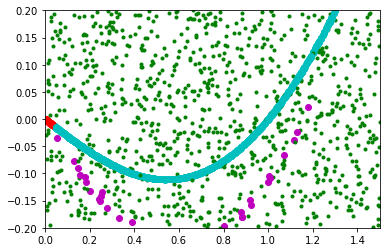

In [206]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [207]:
def Error_func(hh, m, la, list1, list2):
    phi0=np.array([v[0] for v in list1])
    pi0=np.array([v[1] for v in list1])
    phi1=np.array([v[0] for v in list2])
    pi1=np.array([v[1] for v in list2])
    phi_0, pi_0=LP2(hh, m, la, phi0, pi0)
    phi_1, pi_1=LP2(hh, m, la, phi1, pi1)
    PPlist=t_func(pi_0)
    NNlist=t_func(pi_1)
    sum_p=sum(PPlist)
    sum_n=batch-sum(NNlist)

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return E_reg1+E_reg2+sum_p+sum_n

In [208]:
for i in range (set):
    print(Error_func(h_real, m2, lam, Positive[i], Negative[i]))
    
for i in range (set):
    print(Error_func(h, m2_2, lam2, Positive[i], Negative[i]))

tf.Tensor(1.000402329103764, shape=(), dtype=float64)
tf.Tensor(0.0002212431420878419, shape=(), dtype=float64)
tf.Tensor(0.00022146771759847417, shape=(), dtype=float64)
tf.Tensor(0.0002474088779190936, shape=(), dtype=float64)
tf.Tensor(0.00022181008869472552, shape=(), dtype=float64)
tf.Tensor(1.0002184337854014, shape=(), dtype=float64)
tf.Tensor(0.00022168297216731026, shape=(), dtype=float64)
tf.Tensor(0.00022139888503615757, shape=(), dtype=float64)
tf.Tensor(1.379802763425028, shape=(), dtype=float64)
tf.Tensor(0.00023392492843445523, shape=(), dtype=float64)
tf.Tensor(0.0002212802408708875, shape=(), dtype=float64)
tf.Tensor(1.000221311211311, shape=(), dtype=float64)
tf.Tensor(1.0001804223676922, shape=(), dtype=float64)
tf.Tensor(0.00022137188812067666, shape=(), dtype=float64)
tf.Tensor(0.00022174041020830038, shape=(), dtype=float64)
tf.Tensor(0.00022136808441921175, shape=(), dtype=float64)
tf.Tensor(0.8999983381405371, shape=(), dtype=float64)
tf.Tensor(0.000221385869504

tf.Tensor(9.006134124368758, shape=(), dtype=float64)
tf.Tensor(10.006139955425576, shape=(), dtype=float64)
tf.Tensor(10.006139956442139, shape=(), dtype=float64)
tf.Tensor(9.006309020122863, shape=(), dtype=float64)
tf.Tensor(10.006139955425576, shape=(), dtype=float64)
tf.Tensor(9.006140128792484, shape=(), dtype=float64)
tf.Tensor(10.0061395943728, shape=(), dtype=float64)
tf.Tensor(9.006139967559458, shape=(), dtype=float64)
tf.Tensor(11.00613986587316, shape=(), dtype=float64)
tf.Tensor(10.006643554720892, shape=(), dtype=float64)
tf.Tensor(9.829911503747832, shape=(), dtype=float64)
tf.Tensor(9.041704400922875, shape=(), dtype=float64)
tf.Tensor(9.008531364387201, shape=(), dtype=float64)
tf.Tensor(10.006139955416094, shape=(), dtype=float64)
tf.Tensor(10.403388919236797, shape=(), dtype=float64)
tf.Tensor(9.987874176716547, shape=(), dtype=float64)
tf.Tensor(10.876575105589604, shape=(), dtype=float64)
tf.Tensor(9.009381497613548, shape=(), dtype=float64)
tf.Tensor(7.2017004689

In [209]:
def run(i):
    with tf.GradientTape() as g:
        loss=Error_func(h, m2_2, lam2, Positive[i], Negative[i])
        gradients=g.gradient(loss, [h, m2_2, lam2])
    optimizer.apply_gradients(zip(gradients, [h, m2_2, lam2]))

201 10.002360058075341 -1.243416958570347 0.9503434098446524
[ 0.71065058  1.86216178  1.68611001  2.39685565  1.74926406  2.39131494
  3.87036712  4.89938821  6.86988794 10.5875997 ]


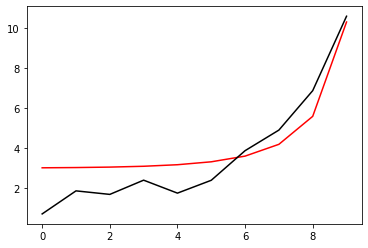

402 10.00479869477418 -1.2578350580342053 0.93767299042949
[ 0.71065797  1.85878418  1.68502263  2.39397191  1.74908458  2.3917832
  3.87323155  4.90695313  6.88083181 10.41909239]


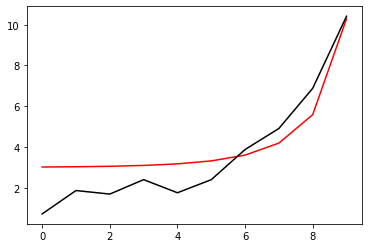

603 10.00573224117329 -1.2710680308027522 0.9281048527314688
[ 0.69336035  1.84010164  1.66935177  2.37797256  1.7363007   2.38064922
  3.86583647  4.90689467  6.88765809 10.27470526]


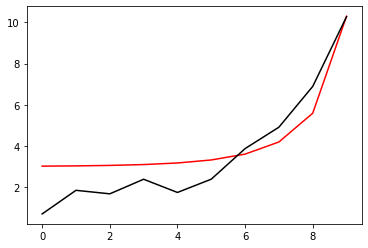

804 10.005710174747318 -1.2882026201559713 0.9116928476159198
[ 0.68014537  1.82563846  1.65802602  2.36591049  1.72679045  2.37110431
  3.85689249  4.90106192  6.88518889 10.15488139]


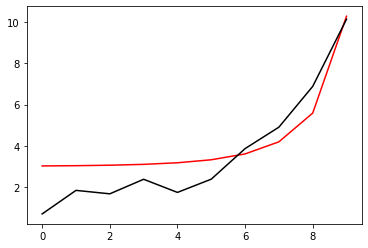

1005 10.005686632389605 -1.2883407425731388 0.9103094336099145
[ 0.68242766  1.82670567  1.66244548  2.36910424  1.7317664   2.37366474
  3.8548932   4.89436979  6.8750406  10.05937053]


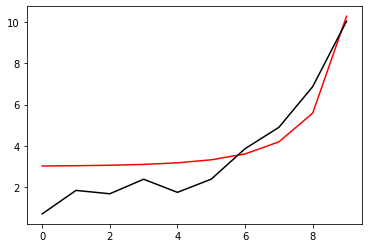

1206 10.005659170546686 -1.286607945047219 0.9108410874669828
[0.68503329 1.82755703 1.66652088 2.371272   1.735135   2.37331556
 3.84827333 4.88187194 6.85868498 9.98684918]


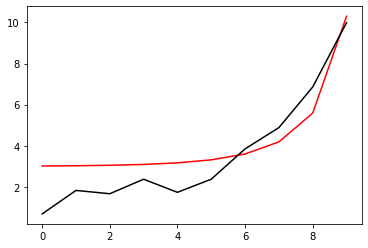

1407 10.005631701495501 -1.2857635821171591 0.9082663286892493
[0.69537066 1.83598194 1.67832586 2.38115473 1.74645006 2.38108187
 3.84976511 4.87667543 6.84821736 9.93494451]


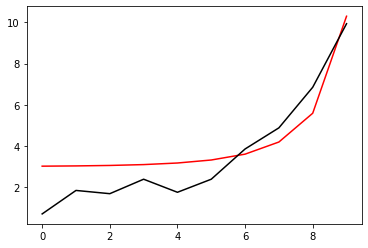

1608 10.005603260192748 -1.3094273899142388 0.8739054935156808
[0.71453515 1.85325236 1.69941738 2.40033085 1.76719407 2.39783405
 3.85903968 4.8772012  6.84121812 9.90018279]


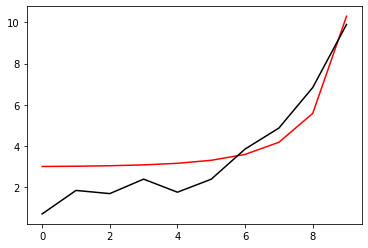

1809 9.0056787109604 -1.302408266515989 0.874940908384172
[0.73888035 1.87607027 1.72658585 2.42562927 1.79401953 2.42016053
 3.87294972 4.88099776 6.83593284 9.87860246]


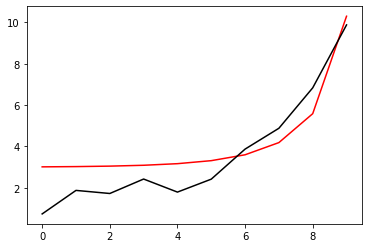

2010 10.00554971747864 -1.2891400770221235 0.8867977916632322
[0.7453073  1.88081639 1.73569207 2.43235842 1.80185762 2.42311473
 3.86842203 4.86936674 6.81875313 9.86613646]


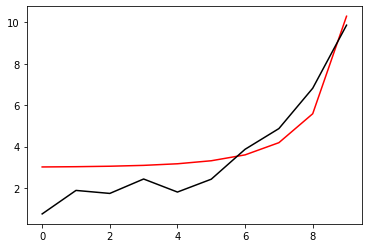

2211 10.069370698872802 -1.2992160634542145 0.8759880300082266
[0.74369865 1.87623356 1.73471875 2.42841165 1.79920384 2.41648726
 3.85685962 4.85471994 6.80235198 9.859212  ]


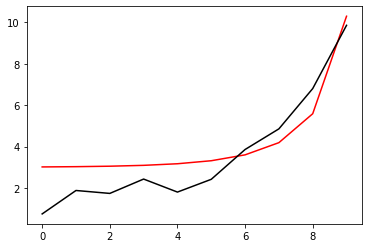

2412 9.005485384354353 -1.289294561812137 0.8851829367887418
[0.74503985 1.87528512 1.73809278 2.42881212 1.80057494 2.41244508
 3.84541026 4.83748354 6.78121407 9.85553933]


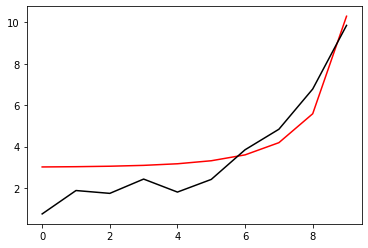

2613 10.00543058547984 -1.2908084096666343 0.8772078300792318
[0.77612565 1.90123825 1.76571471 2.45097988 1.82138432 2.42524656
 3.84748636 4.83015183 6.76719022 9.85341148]


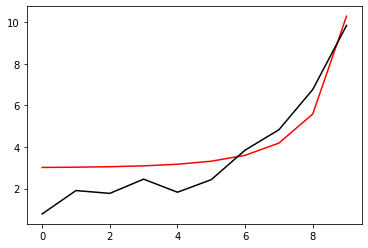

2814 10.00538480400044 -1.282223879523234 0.8844947912773347
[0.78147904 1.90204714 1.76887075 2.44947195 1.81980439 2.41793408
 3.83383911 4.81307308 6.74854251 9.85218687]


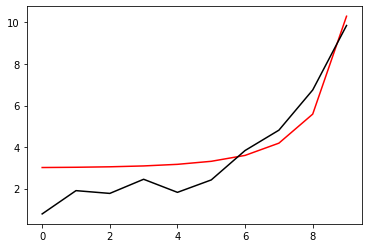

3015 10.005339086645781 -1.2814073362603302 0.88359580838299
[0.78629164 1.90252872 1.77208453 2.44790977 1.8178709  2.40927186
 3.81726671 4.79160664 6.72453342 9.85099506]


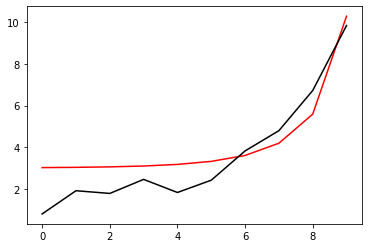

3216 10.005291692701793 -1.2804697570751982 0.8827074475085116
[0.7909845  1.90263383 1.77500206 2.44588231 1.81545328 2.39999582
 3.80003178 4.76958712 6.70011525 9.84978076]


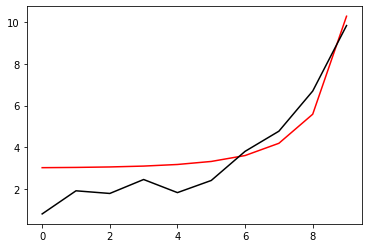

3417 10.005242823665721 -1.2796061348058656 0.8818934239342547
[0.79452382 1.90133487 1.77660704 2.44242003 1.81165236 2.38936124
 3.78168019 4.74690056 6.67542904 9.84855769]


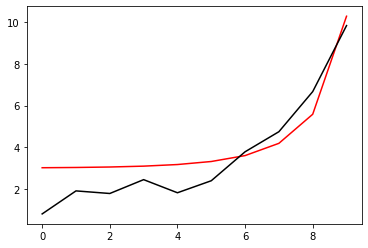

3618 10.005465066836159 -1.2810299147349395 0.8806940450767139
[0.79040123 1.89235317 1.77094128 2.43196131 1.80147371 2.3732967
 3.75968844 4.72279583 6.65107183 9.8473397 ]


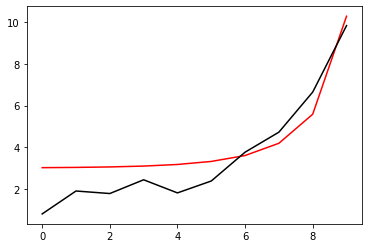

3819 10.004697464883431 -1.2523497082631296 0.9104441156109873
[0.78052248 1.87912967 1.76224655 2.41999447 1.7913001  2.35931929
 3.74231959 4.70565338 6.63526458 9.84633228]


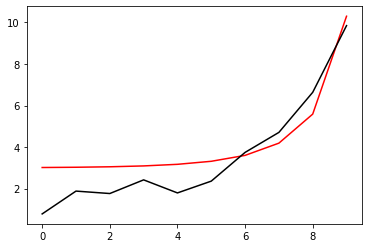

4020 9.005119731401692 -1.2878356737189143 0.8791407494847769
[0.7738712  1.86730939 1.7524295  2.40637232 1.77908796 2.34496576
 3.72782069 4.69511474 6.62890515 9.8458308 ]


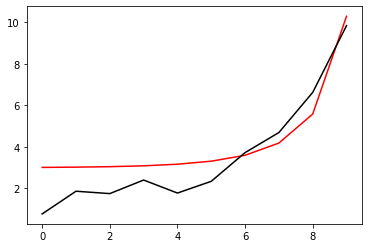

4221 10.00508419739321 -1.3161517622081076 0.8454456971533331
[0.79504361 1.88539319 1.77359151 2.42446224 1.79793083 2.3586477
 3.73314791 4.6922391  6.6200209  9.84536654]


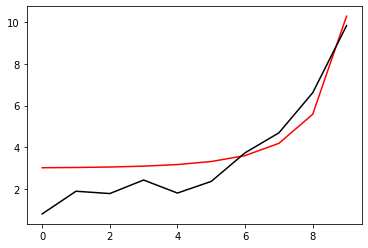

4422 9.282510233852046 -1.297843622672861 0.8565591050014177
[0.83142319 1.91865277 1.80943486 2.45653157 1.82953744 2.38322142
 3.74630124 4.69323169 6.61158573 9.84507741]


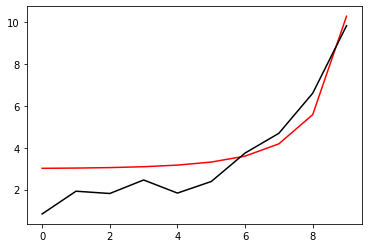

4623 10.058551785888996 -1.2978678625286566 0.8545118086536687
[0.84283192 1.92563163 1.8182368  2.46103476 1.83392524 2.38250046
 3.73964251 4.68292219 6.5994096  9.84454002]


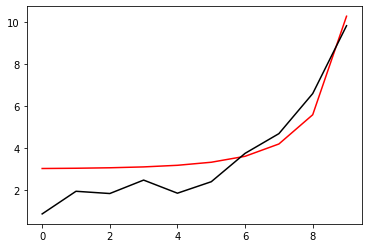

4824 10.004960870102355 -1.3017996221544548 0.8487496823592807
[0.84845617 1.92687507 1.82148375 2.4594804  1.83148929 2.37321172
 3.72232804 4.6609086  6.57541404 9.84352292]


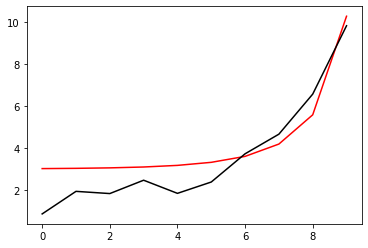

5025 9.99366111582893 -1.2999370512048267 0.8489538670009191
[0.85304988 1.92668758 1.82330956 2.45601265 1.82682054 2.36095868
 3.70154334 4.63557334 6.54839365 9.8422471 ]


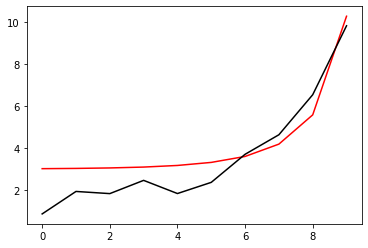

5226 10.00486917054232 -1.296575090435074 0.8515497206783798
[0.85430449 1.92313646 1.82208337 2.44961754 1.81965498 2.34677879
 3.68001321 4.61105256 6.52335864 9.84102176]


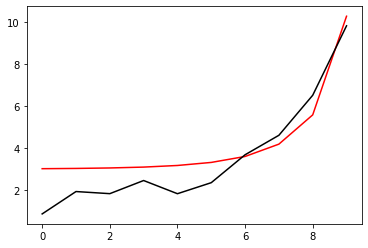

5427 8.005910253295818 -1.2833836398857574 0.8636021741356246
[0.85700306 1.92110285 1.822547   2.44498541 1.8143366  2.33427983
 3.65977365 4.5875535  6.49923856 9.8398512 ]


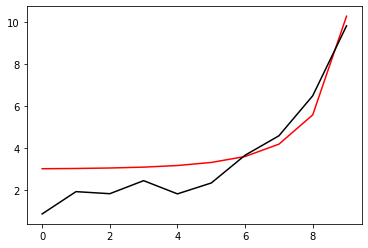

5628 8.057603975958692 -1.279388911175947 0.8719117349889568
[0.8343859  1.89499923 1.80009349 2.41852015 1.78835534 2.30306878
 3.62516301 4.55574604 6.4715675  9.83862788]


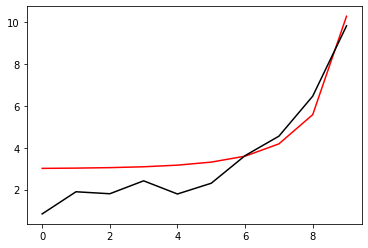

5829 8.004856271197722 -1.3015345347140248 0.8438332271578342
[0.86011289 1.91615253 1.82366942 2.43748046 1.80688513 2.31406432
 3.62543595 4.54736895 6.4578851  9.83781084]


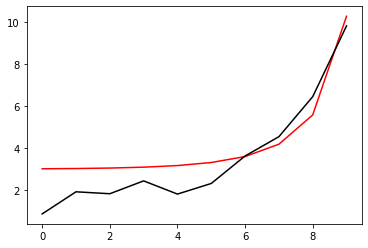

6030 10.00470870103944 -1.289931083998257 0.8517316298027521
[0.88000662 1.93242696 1.84288114 2.45296501 1.82283142 2.32436
 3.62783199 4.5433733  6.44974443 9.83740177]


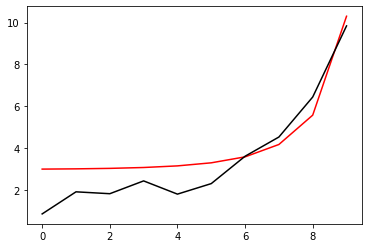

6231 10.004669980479925 -1.2849504755994423 0.8564172774000995
[0.87826722 1.92671579 1.83987923 2.4452521  1.81443444 2.30889592
 3.60499789 4.51762848 6.42358279 9.83629192]


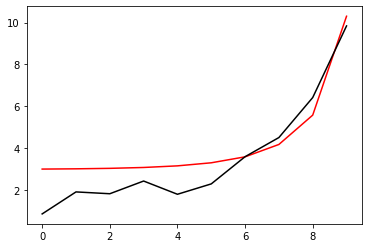

6432 10.004623908420538 -1.2950332325035299 0.845816733587773
[0.87806067 1.92120872 1.83615118 2.43584788 1.80377017 2.29093071
 3.58032686 4.49135689 6.39791106 9.83505651]


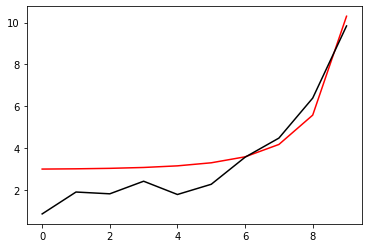

6633 9.003768933391935 -1.2870085258015342 0.8528714521967415
[0.87923572 1.91727579 1.83419888 2.42802011 1.79414774 2.27268814
 3.55341425 4.46132469 6.36771021 9.83364402]


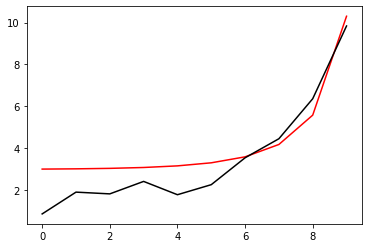

6834 9.006432512069715 -1.293009678246907 0.8444258414665718
[0.88766145 1.92009455 1.83876401 2.42654183 1.79087151 2.26071816
 3.53227344 4.43614472 6.34153061 9.83241636]


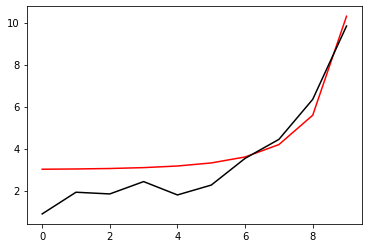

7035 10.004479304617432 -1.2837563187763925 0.8519172719835012
[0.89101917 1.9180998  1.83869789 2.42023101 1.78222822 2.2423924
 3.50385377 4.4036398  6.30847304 9.83089618]


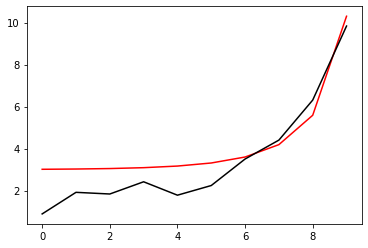

7236 10.00442315904909 -1.2893057288498113 0.8424482756712658
[0.90451837 1.92512159 1.84676871 2.42134697 1.78042953 2.23022375
 3.48043882 4.37473999 6.27796952 9.82948407]


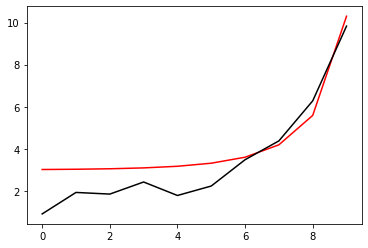

7437 10.004381982661092 -1.276603082120296 0.8547558249155992
[0.89814618 1.91428461 1.8386202  2.40725719 1.76402844 2.2038999
 3.44454408 4.33636075 6.24054631 9.82777591]


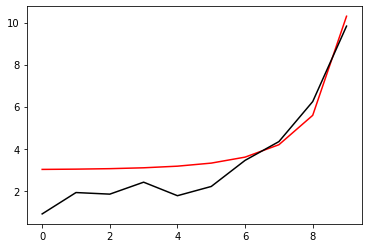

7638 10.004354192285337 -1.2636241361420257 0.8721129514639464
[0.86918277 1.88236415 1.80976746 2.37334204 1.7279424  2.15851697
 3.39220751 4.28724047 6.19771565 9.82581224]


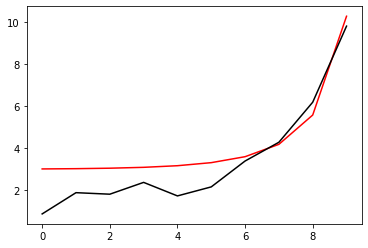

7839 10.225730427498391 -1.267793950583619 0.8729618652435962
[0.84506727 1.85525663 1.78522666 2.34418276 1.69674669 2.11827733
 3.3440702  4.24103279 6.15712318 9.82391306]


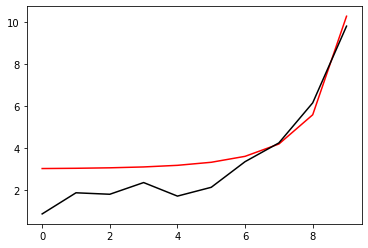

8040 10.004294790375578 -1.2695896462207743 0.8757630841131983
[0.82347876 1.83012594 1.76187496 2.31589687 1.66609447 2.07882583
 3.29733539 4.19708868 6.11965408 9.82219322]


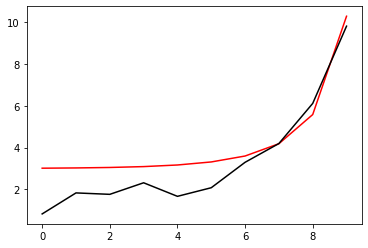

8241 9.004258987710173 -1.2722013640295133 0.8694814581318906
[0.83479097 1.8375834  1.77070016 2.31985396 1.66769714 2.0709321
 3.27697682 4.16926545 6.08973889 9.82086177]


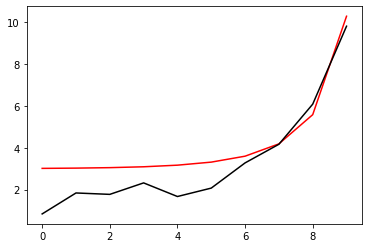

8442 10.004223178889006 -1.2715712661790215 0.8652054887026762
[0.84965907 1.84900165 1.7834235  2.3273664  1.67183815 2.06362633
 3.253806   4.13502687 6.05125369 9.81910252]


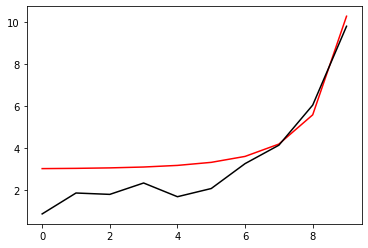

8643 11.00419339789944 -1.2719376064691472 0.8635107858745688
[0.84792992 1.84428483 1.78061681 2.31989378 1.66170387 2.04359896
 3.22190868 4.09746617 6.01338031 9.81737004]


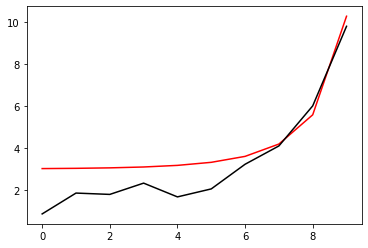

8844 9.004262108765927 -1.2580199988653331 0.8730761690247681
[0.85818864 1.85080507 1.78815864 2.32143534 1.65875508 2.02774692
 3.18972545 4.05532027 5.96819637 9.81530442]


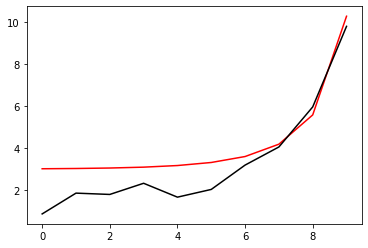

9045 10.004111744434748 -1.2834741703440662 0.8394937491785375
[0.88737589 1.87527152 1.81273024 2.33933379 1.67150187 2.02669539
 3.17019269 4.02218005 5.92874103 9.81349776]


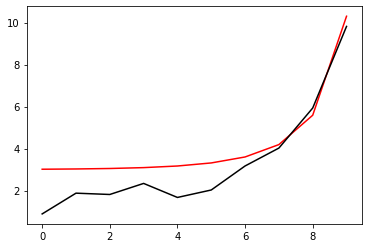

9246 10.004069646129217 -1.2764390482048404 0.8390348149482236
[0.91151383 1.89490802 1.83247266 2.35226933 1.67905071 2.02051472
 3.14624472 3.98534608 5.88588843 9.81160658]


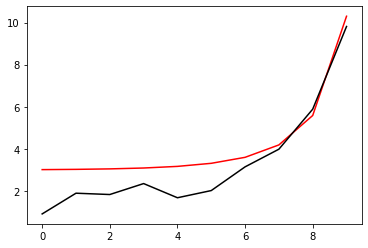

9447 10.004026355830959 -1.2733000741658866 0.8329739917139556
[0.93661964 1.91544102 1.85296529 2.36514293 1.68518248 2.01052409
 3.11574164 3.94017867 5.83389387 9.8092263 ]


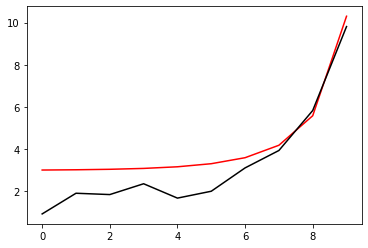

9648 9.00406085608636 -1.2693394800933502 0.8296307467201062
[0.95212835 1.92599269 1.86333412 2.36729683 1.68010264 1.98908388
 3.07551806 3.88860198 5.77807908 9.80666488]


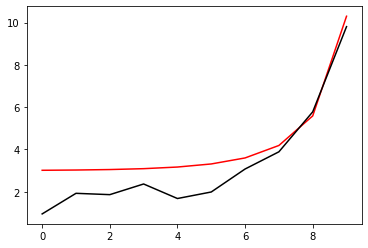

9849 9.000217957286152 -1.260379870459561 0.832629456094071
[0.96898933 1.93829793 1.87603691 2.37303697 1.68039381 1.97587355
 3.04662526 3.85005281 5.7358835  9.80474523]


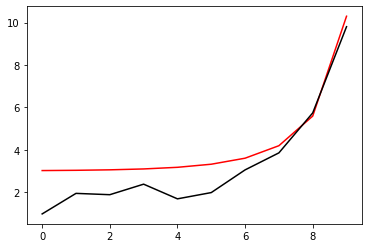

In [211]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%set], Negative[i%set]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 9.450162530254635 -1.231982129587531 0.8545516165481908
[0.97337199 1.93521444 1.87470827 2.35942318 1.65248457 1.92741525
 2.97519983 3.76896372 5.65659641 9.80110431]


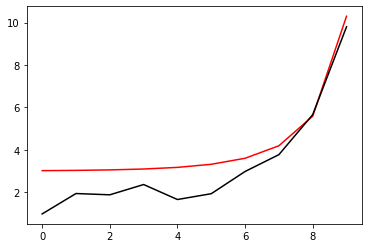

402 10.003842174925971 -1.2476305264075362 0.8378229963473891
[0.96994146 1.92870735 1.86935232 2.34944597 1.6394631  1.90482136
 2.94056138 3.72782887 5.6153895  9.79917972]


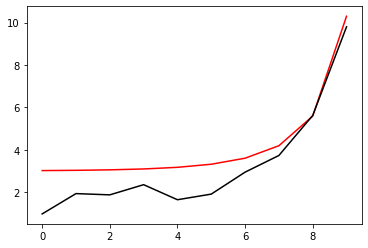

603 10.003835027576573 -1.2614067178344248 0.820788863952733
[0.97173542 1.92737849 1.86909759 2.34465103 1.63171552 1.887742
 2.91122179 3.69051556 5.57630102 9.79739344]


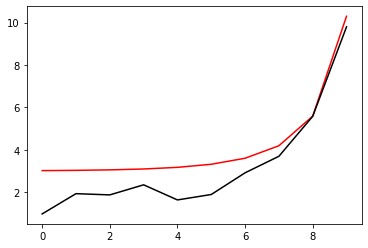

804 10.003816008233883 -1.2549174514912822 0.8254458599145482
[0.97114255 1.92501521 1.86864403 2.34032972 1.62462319 1.87099491
 2.88085362 3.65003488 5.53251864 9.79539895]


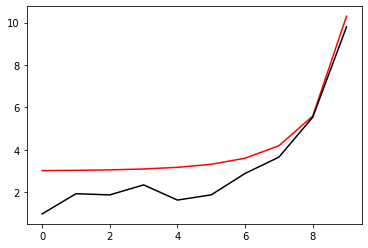

1005 10.003787042513123 -1.2545973316445116 0.8207568822166612
[0.9865373  1.93698822 1.88135254 2.34833438 1.6296382  1.86681987
 2.8638218  3.62218675 5.49930402 9.79388104]


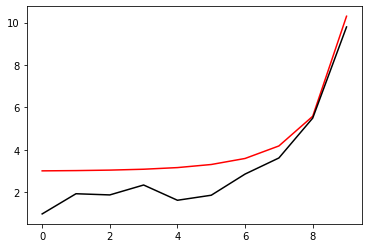

1206 10.003772129761137 -1.254226036019649 0.8205746668331104
[0.98078255 1.92993856 1.87701364 2.34107752 1.62099305 1.85056247
 2.83679993 3.58707171 5.46128595 9.79214834]


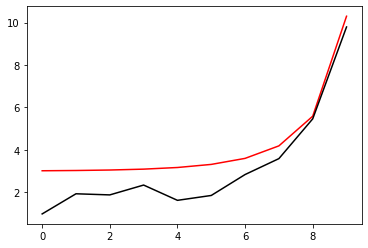

1407 10.003745217544578 -1.2530159586028418 0.8183663041054683
[0.98650164 1.93242562 1.88040279 2.3397041  1.61651286 1.83666466
 2.8101202  3.55029763 5.42016153 9.79024953]


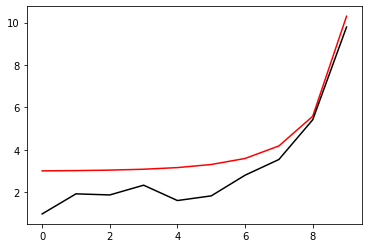

1608 10.003726746009477 -1.2481139977085534 0.8214011527712921
[0.98528949 1.92931488 1.87963803 2.33551201 1.61065427 1.82298191
 2.78536795 3.51656247 5.38244591 9.78851562]


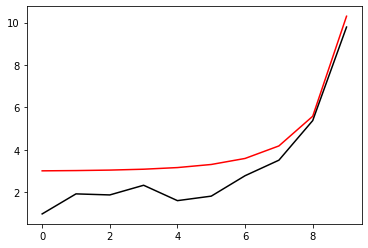

1809 8.966488327295401 -1.2503443164106836 0.8152692377980308
[0.99376959 1.93512504 1.8872339  2.33915674 1.61233407 1.8166466
 2.76759554 3.48860673 5.34884537 9.78696543]


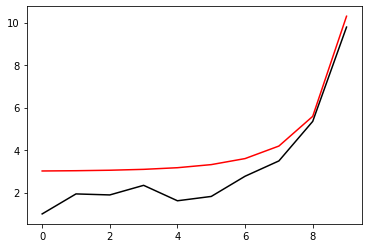

2010 10.003688878865471 -1.250861767798659 0.8171018496415148
[0.98356887 1.92325629 1.87840282 2.32841198 1.60236999 1.80313177
 2.74954306 3.46823942 5.3288193  9.78604536]


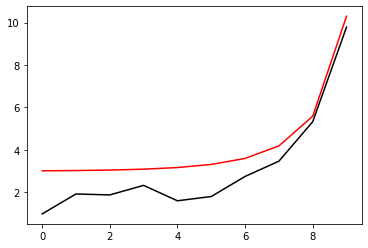

2211 10.002832994964834 -1.2501572980895286 0.8155403497693829
[0.99061047 1.92797172 1.88499411 2.33191903 1.60500542 1.79993821
 2.73788551 3.44881747 5.30501116 9.78494722]


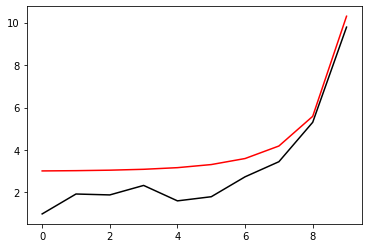

2412 9.072667357879105 -1.2450214162110167 0.8192712716238625
[0.98981108 1.92596502 1.88586332 2.33059893 1.60347132 1.79298142
 2.72256289 3.42564196 5.27746126 9.78367659]


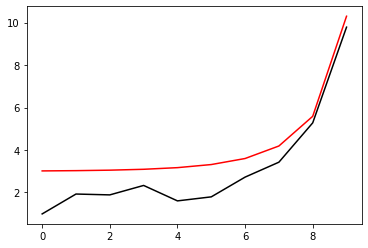

2613 10.003640888669674 -1.2482273320895492 0.8146703346983402
[0.99089249 1.92561213 1.88823005 2.33045163 1.60277987 1.78634818
 2.70687204 3.40131757 5.24807726 9.78234303]


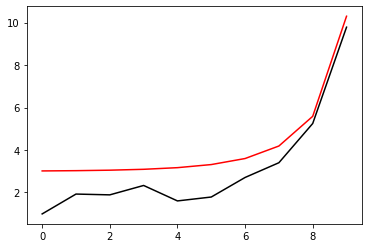

2814 10.003617207717987 -1.2434681873357358 0.8169621837173336
[1.00097072 1.93258398 1.89654734 2.33555762 1.60741337 1.78654407
 2.7011702  3.39049491 5.23427688 9.78170177]


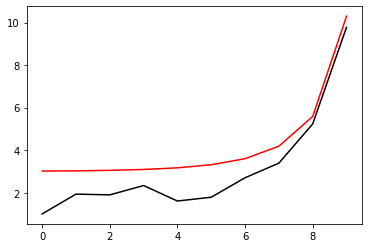

3015 10.992601930745968 -1.2423099969439932 0.8162390898009572
[1.00239568 1.93187344 1.89786767 2.33378107 1.60449469 1.77715485
 2.68219605 3.36241436 5.20091706 9.78018615]


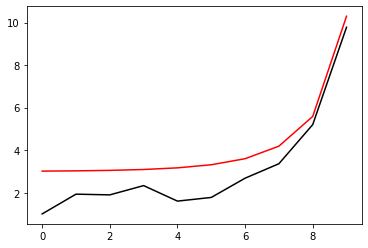

3216 10.003470526643047 -1.2443870502924845 0.8136339005970421
[0.99996886 1.92749416 1.8958716  2.32920444 1.5995042  1.76672044
 2.66371536 3.33676859 5.1716355  9.7788495 ]


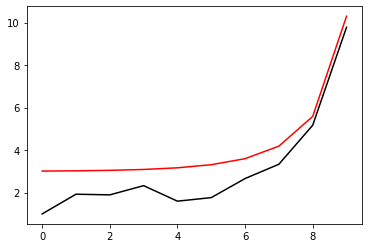

3417 10.00369280506675 -1.2457356492083485 0.8125744411439291
[0.99469386 1.92083321 1.89205951 2.32341472 1.5938792  1.75634011
 2.64604255 3.31261518 5.14434239 9.77760747]


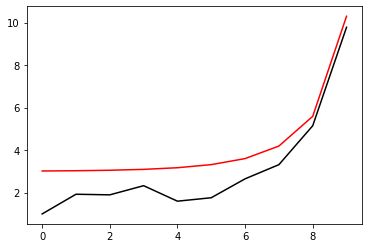

3618 9.93213885120793 -1.2468378783671596 0.8101031091216504
[0.99778275 1.92224202 1.89589118 2.32503786 1.59553817 1.75346709
 2.63623821 3.29613257 5.12384398 9.77665066]


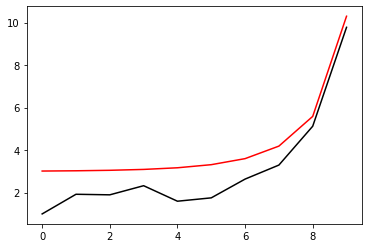

3819 9.584528064688946 -1.238594731003645 0.8213706404150054
[0.98033069 1.90552853 1.88414458 2.31379271 1.5871765  1.74385764
 2.62397757 3.28216697 5.10985581 9.77605836]


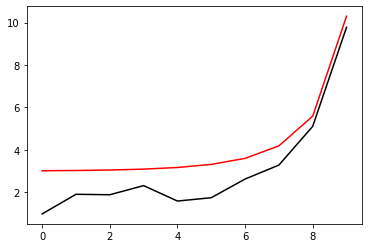

4020 9.00354104347478 -1.238325692382216 0.8192183526620671
[0.98571862 1.90954414 1.89075509 2.31809122 1.59107582 1.74209571
 2.61321717 3.26216761 5.08375257 9.77487453]


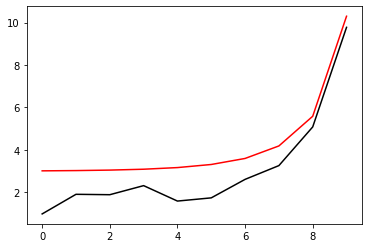

4221 9.990976396179692 -1.2422195181071554 0.8114312944696039
[1.00151834 1.92329492 1.90641788 2.33086863 1.6030245  1.74825074
 2.610479   3.24998308 5.06463589 9.77402222]


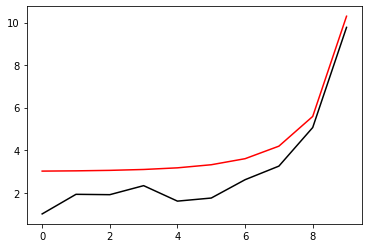

4422 10.003238540268258 -1.234382158014211 0.8173386031054731
[1.00150055 1.92162749 1.90719843 2.32896687 1.60035388 1.73941575
 2.59251291 3.22355876 5.03324996 9.77256212]


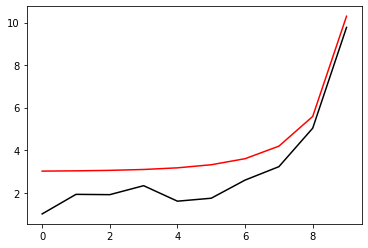

4623 10.643075901429077 -1.2246327326440547 0.8231717708821974
[1.00921487 1.92813384 1.91657566 2.33596075 1.60679608 1.73965574
 2.58303464 3.20418872 5.00708986 9.77135203]


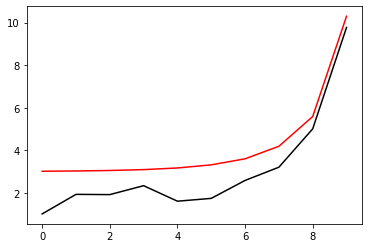

4824 11.003473162747621 -1.2238790727194262 0.821228214872822
[1.01361359 1.92954314 1.91919168 2.33450084 1.60317626 1.72813096
 2.56056315 3.1724433  4.97068864 9.76967344]


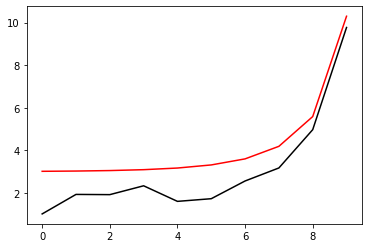

5025 8.0750050931984 -1.22201570995111 0.8197396010352923
[1.01930235 1.93210727 1.92302138 2.33411168 1.60053568 1.71723191
 2.53826669 3.14081631 4.93464359 9.76801254]


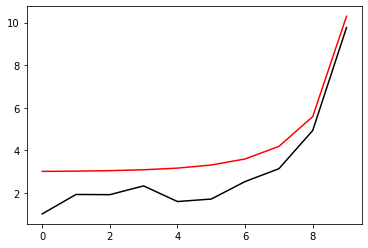

5226 10.00342739447641 -1.2203914761699146 0.8177779730659839
[1.02494766 1.9346211  1.92700059 2.33388919 1.59813848 1.70643834
 2.51592844 3.10938681 4.89917872 9.76637835]


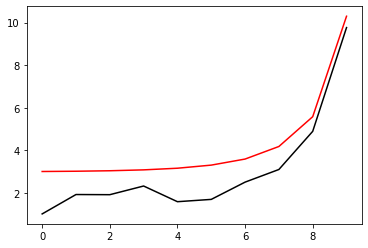

5427 8.003417944131744 -1.2201058713406656 0.8156657891739427
[1.02642271 1.93324524 1.92764721 2.33085013 1.59363454 1.69435853
 2.49358858 3.07967734 4.86676946 9.76488423]


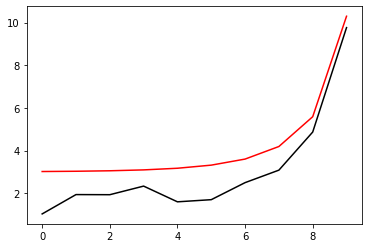

5628 9.000648375856834 -1.2283273768853045 0.810265013997638
[1.01220315 1.91873275 1.91776356 2.32012044 1.58467491 1.68207552
 2.47662967 3.06043561 4.84762137 9.76400007]


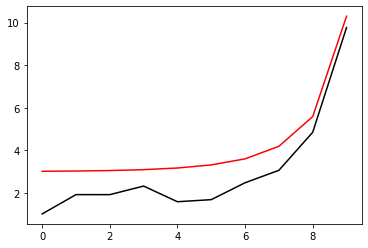

5829 8.003396001226715 -1.214260048144777 0.8229259638637884
[1.00813411 1.91354509 1.91604827 2.31666449 1.58177947 1.67439252
 2.46192869 3.04055403 4.82562437 9.76297951]


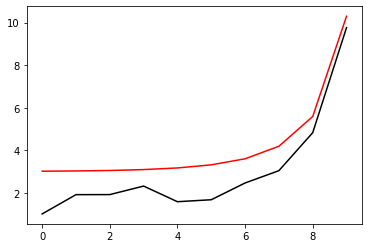

6030 10.003373698530714 -1.2181725590283117 0.8177010293441265
[1.00701756 1.91005691 1.91474129 2.31244828 1.57682721 1.6632956
 2.44238061 3.01486355 4.79756059 9.76169276]


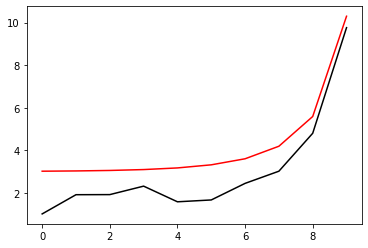

6231 9.959411095313666 -1.2191621951905125 0.8137945209865256
[1.00978216 1.91044214 1.91729364 2.31192813 1.57530133 1.65517588
 2.42499169 2.99008075 4.76925275 9.7603965 ]


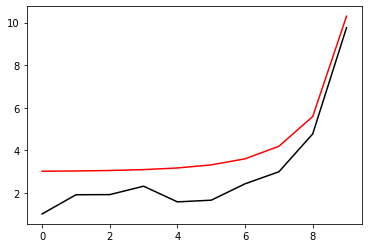

6432 10.00334033189496 -1.2165689825030044 0.8135861850794743
[1.0149256  1.91347766 1.92287428 2.31519091 1.57856644 1.65345994
 2.41592189 2.97464322 4.75019728 9.75953565]


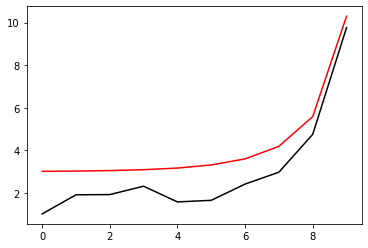

6633 8.148952643854544 -1.224682907662402 0.803665264840508
[1.01680171 1.91381092 1.92620848 2.31662798 1.5803506  1.65069497
 2.40635467 2.95918347 4.73128579 9.75869094]


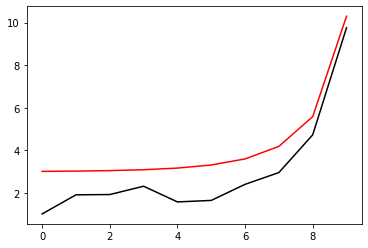

6834 9.373497116651235 -1.2224551674043709 0.8032610839908401
[1.02095017 1.91651793 1.93192293 2.32035871 1.58426644 1.64994833
 2.39863214 2.94506147 4.7130481  9.75785272]


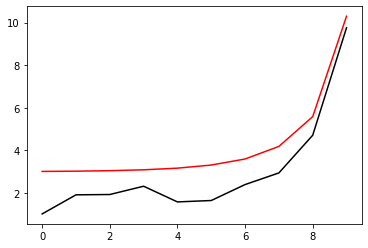

7035 10.003188265011783 -1.2203646972976092 0.7990629032730687
[1.03946558 1.93219224 1.94902723 2.33398924 1.59638357 1.65547167
 2.39458603 2.93149811 4.69274031 9.75692521]


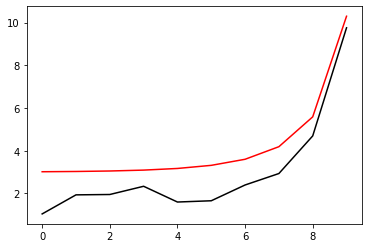

7236 10.00329482768504 -1.216472894023927 0.8042974876446147
[1.02980674 1.92290232 1.944442   2.32905245 1.59317224 1.64937598
 2.38386651 2.91697742 4.67623743 9.75616213]


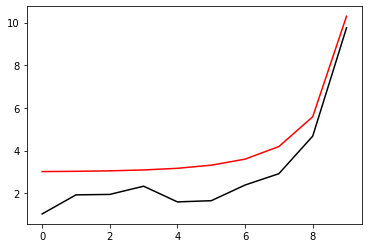

7437 10.00328104343284 -1.2171874255646027 0.7992855716755289
[1.04378783 1.93441873 1.95791823 2.339801   1.60328795 1.65412616
 2.38075234 2.90618232 4.66005439 9.75540567]


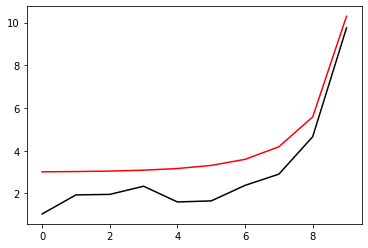

7638 10.003267468776034 -1.2064427696378772 0.8084565258615662
[1.04156891 1.93112887 1.95761746 2.337287   1.6002085  1.64522537
 2.36361536 2.88200895 4.63194028 9.75413474]


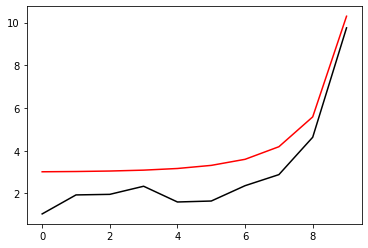

7839 9.004273637837148 -1.2177401613373044 0.7970972790179879
[1.03791644 1.92684571 1.95700644 2.33539102 1.5989662  1.63974458
 2.35182883 2.86483546 4.61171236 9.75319003]


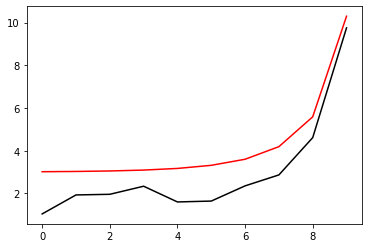

8040 9.96847429202224 -1.2167876415258183 0.7984312947180016
[1.03158177 1.92042339 1.95468871 2.33239699 1.59727695 1.6346958
 2.3415583  2.85019501 4.59469237 9.75242069]


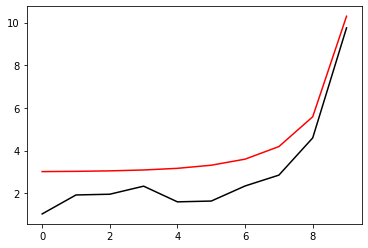

8241 8.986733314532328 -1.2181819929869895 0.7952761589105299
[1.03397904 1.92248478 1.96014075 2.33629129 1.60111231 1.6331996
 2.33200619 2.83314728 4.57280554 9.75142718]


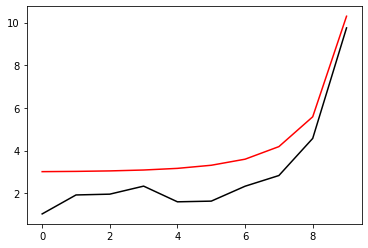

8442 10.003478026781423 -1.215437269647364 0.7935050448529042
[1.04531188 1.93190249 1.97137336 2.34421477 1.60710686 1.63165667
 2.31988524 2.8112521  4.54449895 9.75013375]


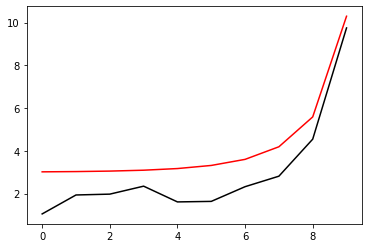

8643 10.999385709716273 -1.1995902900366773 0.8060755543918471
[1.04613006 1.932187   1.97492309 2.34563032 1.60768675 1.62564292
 2.30435702 2.78709946 4.51486845 9.74877704]


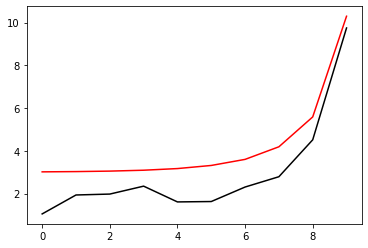

8844 9.003213701849583 -1.2196702452846873 0.7861306250778282
[1.04225341 1.92647531 1.97143339 2.33933856 1.60017266 1.61157831
 2.2816576  2.75766553 4.48215079 9.74727386]


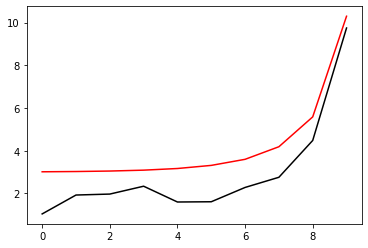

9045 10.003211889639626 -1.1952718796284034 0.8049244429410762
[1.05418202 1.93692847 1.9840589  2.34885173 1.60778976 1.61149064
 2.27066471 2.7364519  4.45411214 9.74599679]


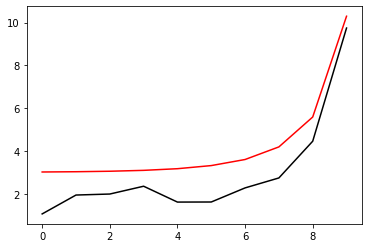

9246 10.003187612900993 -1.1938026126693173 0.8022451806941192
[1.05941674 1.93825037 1.98508827 2.34399466 1.59813063 1.59105652
 2.2370933  2.69267578 4.40528705 9.74376828]


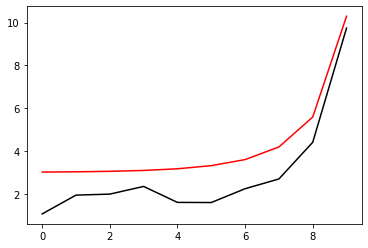

9447 10.003166610810197 -1.1905236628567526 0.8002819040940882
[1.06672752 1.94142752 1.98786833 2.34058131 1.58958447 1.57119109
 2.203432   2.64818206 4.35523214 9.74147153]


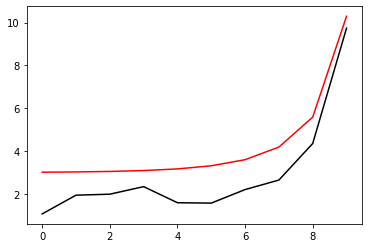

9648 9.003143729574766 -1.1870827723702002 0.7978870060068175
[1.07467146 1.94501393 1.99100649 2.33732734 1.58107413 1.55120454
 2.16966223 2.60374223 4.30531428 9.7391755 ]


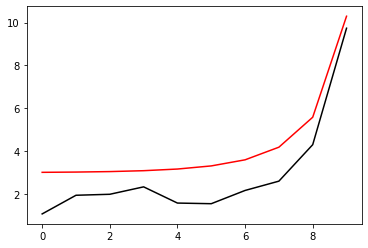

9849 8.073378815318494 -1.184151328918126 0.7964374678888494
[1.07963269 1.94564192 1.99161668 2.33220933 1.57180749 1.53215713
 2.1392678  2.56519553 4.26309322 9.73723321]


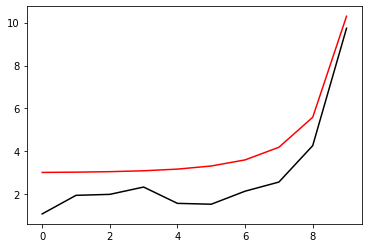

In [212]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%set], Negative[i%set]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 9.005532750163285 -1.188945564516339 0.7799061001344447
[1.09431982 1.94475287 2.00269412 2.32117332 1.56583158 1.50012664
 2.09098957 2.50909256 4.20150215 9.73438715]


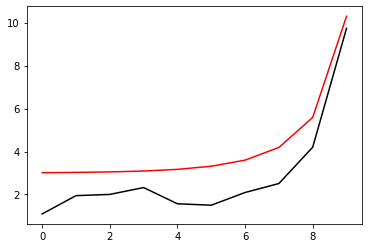

402 10.003595065509984 -1.18965344007145 0.7788314884794644
[1.08704815 1.93727384 1.9985876  2.31572288 1.56026502 1.48995268
 2.07443762 2.48688185 4.17560581 9.73323069]


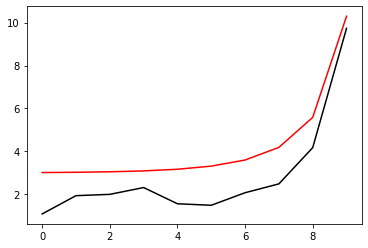

603 10.001659004076998 -1.1777782486305284 0.7909648436038852
[1.07325469 1.92353479 1.98848318 2.30460989 1.54937844 1.47483175
 2.05333561 2.46056648 4.14605855 9.73188691]


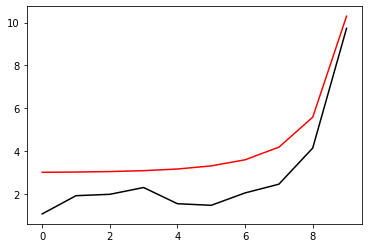

804 10.003000461171926 -1.1758844739039527 0.7895582402677082
[1.07922473 1.9269264  1.99275844 2.3054426  1.54816506 1.46737871
 2.03791118 2.43793328 4.1184354  9.73062156]


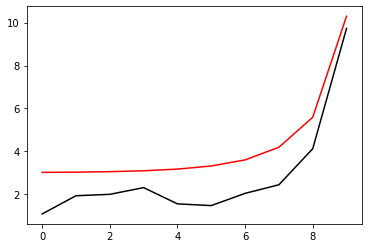

1005 10.002983176653913 -1.1737873890191575 0.7886415709691018
[1.08475918 1.92925189 1.99567828 2.30478479 1.54560255 1.45900974
 2.02233848 2.41613657 4.09259049 9.72942115]


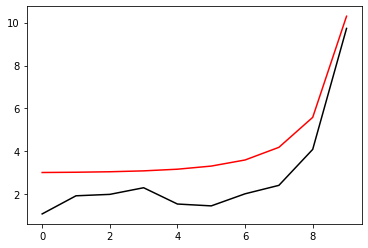

1206 10.002962165740366 -1.1815538106687427 0.776694083443119
[1.09397951 1.93451453 2.00089954 2.30593791 1.54441059 1.4516182
 2.00726355 2.39432906 4.06638077 9.7282248 ]


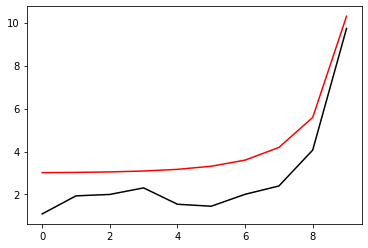

1407 10.00296923541557 -1.1940506523298693 0.7692078044663694
[1.07005043 1.91202761 1.98364442 2.28984007 1.53110161 1.43746024
 1.99127075 2.37738586 4.04979388 9.72747931]


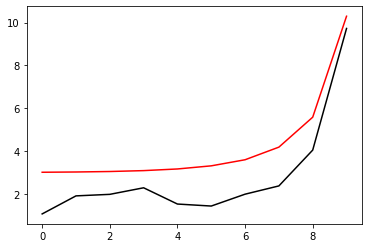

1608 10.002977395064864 -1.1793590282508022 0.7864784951276348
[1.05296402 1.89656841 1.97316516 2.28007551 1.52320593 1.42716476
 1.97658263 2.35845528 4.02812723 9.72649782]


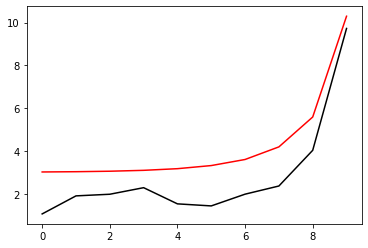

1809 8.036598775072092 -1.1830695499274673 0.7823454779970377
[1.04842032 1.89094186 1.96993132 2.27532181 1.51829458 1.41806103
 1.96139157 2.33751515 4.00335557 9.72537284]


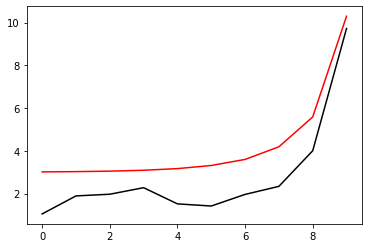

2010 10.010911722740115 -1.1752496570146278 0.7891755513314105
[1.04586474 1.88836754 1.97062083 2.27527738 1.51872109 1.41475328
 1.95213586 2.32216665 3.98348595 9.7244559 ]


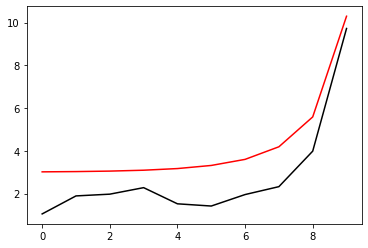

2211 10.001737479457827 -1.174167047793598 0.7873197989134971
[1.05127323 1.89184595 1.97563991 2.27786536 1.52028693 1.41119928
 1.94140477 2.30440445 3.96058008 9.72339055]


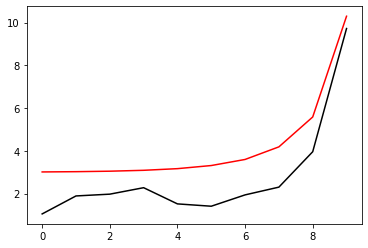

2412 10.002948017129492 -1.1726459691650741 0.7855040247204159
[1.05794246 1.89621997 1.98135188 2.28084315 1.5220246  1.4075688
 1.9303813  2.28618161 3.93706357 9.72230333]


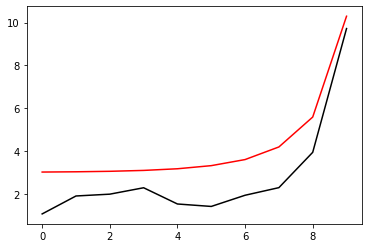

2613 10.120821957173831 -1.174582839468057 0.7815293783167723
[1.05924334 1.895476   1.98240835 2.27959237 1.52010665 1.40095084
 1.9172826  2.26698571 3.91358221 9.72121631]


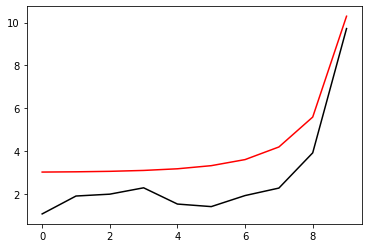

2814 9.998041173160408 -1.1779407511283528 0.7779253920158639
[1.0536348  1.88871484 1.97842004 2.27422437 1.51501571 1.39211324
 1.90304289 2.24783186 3.89127966 9.72019782]


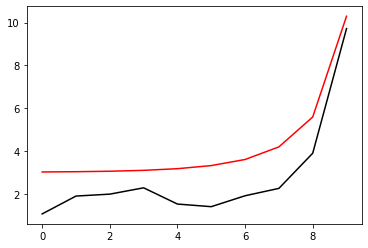

3015 9.15724481969044 -1.1718467004333333 0.7867302438860467
[1.03839343 1.87321533 1.96650375 2.26187146 1.50397883 1.37861427
 1.88582304 2.22775412 3.87009154 9.71922793]


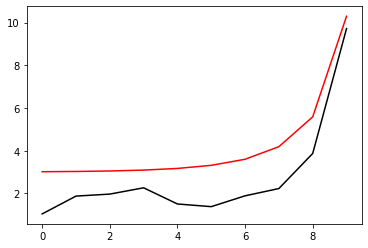

3216 9.633298776317886 -1.1701348230010438 0.7848713941731831
[1.04476385 1.87707042 1.97160405 2.2640094  1.50467086 1.37347519
 1.87253823 2.20645473 3.84303979 9.71800751]


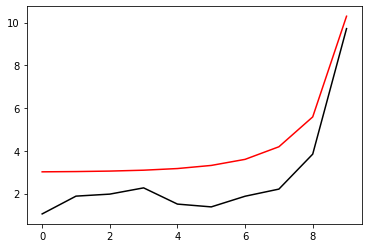

3417 9.992644422177168 -1.1689502849904163 0.782292245867131
[1.05078707 1.88015019 1.97566897 2.26482486 1.50386024 1.36664627
 1.85740471 2.18325905 3.81421712 9.71670406]


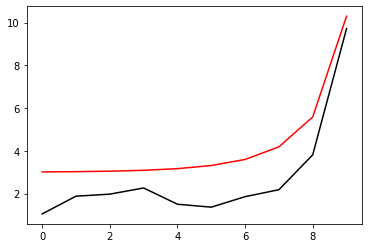

3618 10.003872057686388 -1.1772968896570595 0.7680662335795806
[1.06199042 1.88788243 1.98406115 2.26968427 1.50691578 1.36349205
 1.84561442 2.16279634 3.7873975  9.71546799]


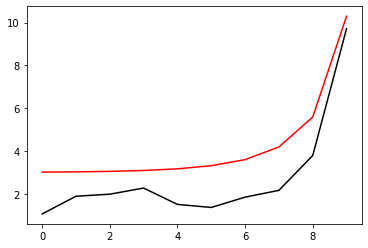

3819 9.009274599034857 -1.1860888322672813 0.7630403907794732
[1.0505409  1.8774523  1.97871835 2.26581354 1.50661686 1.36361688
 1.84540583 2.16264669 3.78779248 9.71550152]


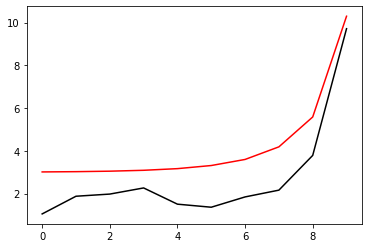

4020 9.202021312058177 -1.1757922368375286 0.7753496315199856
[1.04193822 1.86878019 1.9736094  2.26056268 1.50287282 1.35766492
 1.83564623 2.14938592 3.77275916 9.71480496]


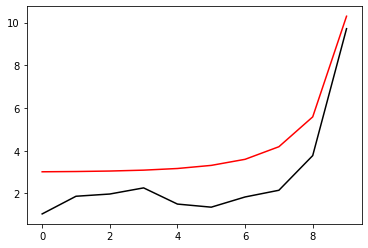

4221 9.066180659628655 -1.167329894209105 0.782005514482026
[1.04137219 1.8668404  1.97358611 2.25856247 1.50019786 1.34994067
 1.8201205  2.12560491 3.74317475 9.71345373]


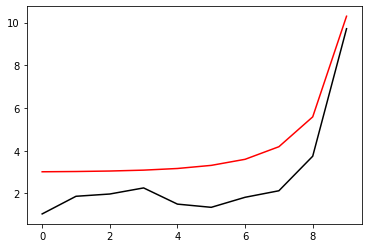

4422 10.002866527562407 -1.1666682154356165 0.7794659218016493
[1.04651422 1.86931991 1.97691975 2.25886389 1.4989209  1.34269757
 1.80409439 2.10035898 3.71148345 9.71198812]


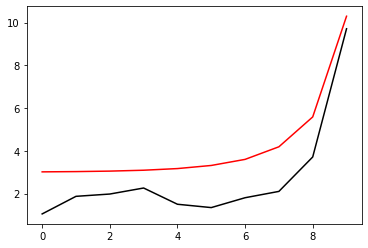

4623 10.019972203126285 -1.1617149710763166 0.7845823346570031
[1.04174201 1.86248497 1.97189257 2.25193405 1.49191503 1.33176356
 1.78742387 2.07851947 3.68710637 9.71085807]


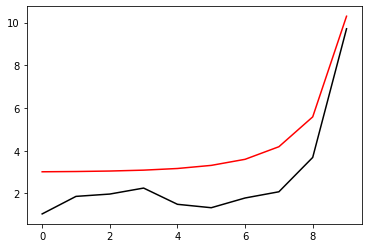

4824 10.006595615564038 -1.1812288545415213 0.7650723251646614
[1.03546487 1.85384684 1.96454459 2.24207154 1.48104183 1.31557918
 1.7635353  2.04786059 3.65424287 9.70934041]


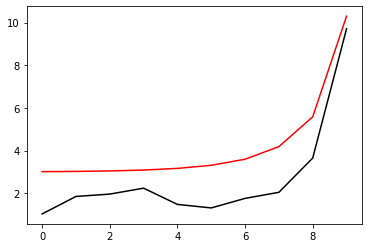

5025 8.003911271977707 -1.1724361591681505 0.7768843861655634
[1.02258777 1.84002186 1.95322199 2.22936459 1.46846392 1.29896799
 1.74097888 2.02090524 3.62727902 9.70810543]


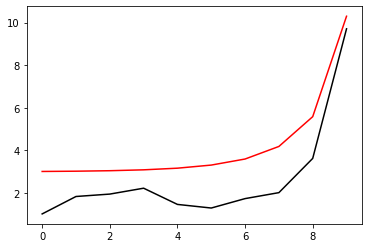

5226 10.002403768226756 -1.1823288228396485 0.7661987910450362
[1.0200287  1.83456586 1.94816105 2.22060763 1.45709762 1.27985629
 1.71080876 1.98120583 3.5850723  9.70617585]


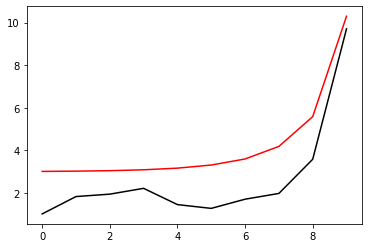

5427 7.994433594847215 -1.171646332142142 0.7760479107058809
[1.01935239 1.83148888 1.94594014 2.21503447 1.44932019 1.26474108
 1.68528429 1.94699405 3.54858677 9.70451383]


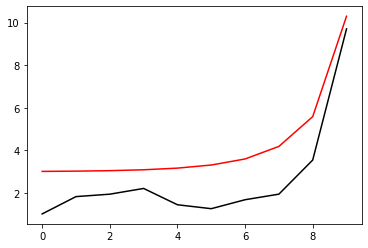

5628 9.001744867671853 -1.1810253295685866 0.7667159196042518
[1.01891422 1.82801814 1.94299923 2.20862939 1.44092086 1.2495524
 1.66094551 1.91601145 3.51708739 9.7030694 ]


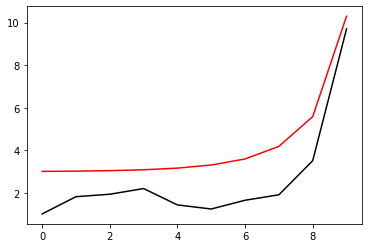

5829 8.002796846516292 -1.1788677982599667 0.7684167391423345
[1.01769833 1.82419911 1.93990641 2.20202687 1.4319985  1.23308058
 1.63415469 1.88145325 3.48129348 9.70142613]


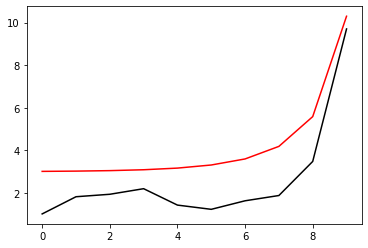

6030 10.002763966690141 -1.1800272706127912 0.7660726681203642
[1.02100175 1.82486504 1.94139276 2.20013709 1.42807594 1.22199522
 1.61329591 1.85317782 3.45137785 9.70006709]


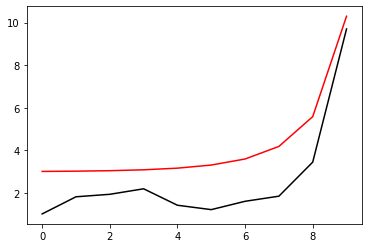

6231 9.053924474118087 -1.1684046242220738 0.7802344679833458
[1.00651701 1.8089849  1.92754585 2.18400485 1.41101093 1.19900724
 1.58285101 1.81939693 3.42011911 9.69864191]


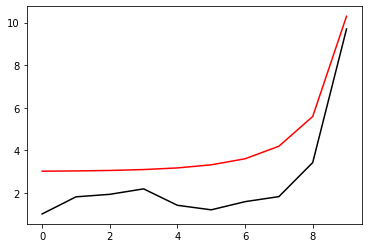

6432 10.002768679012604 -1.167549103595235 0.7814819502015565
[0.99763595 1.79661893 1.91496227 2.16643522 1.38924029 1.16682563
 1.53788795 1.76761318 3.37018326 9.69634961]


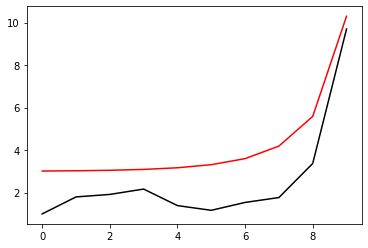

6633 8.003938169172498 -1.1686985483452343 0.7836435036117647
[0.97907648 1.77539209 1.89467266 2.14258265 1.36311155 1.13301472
 1.49556497 1.72347547 3.33111951 9.6945581 ]


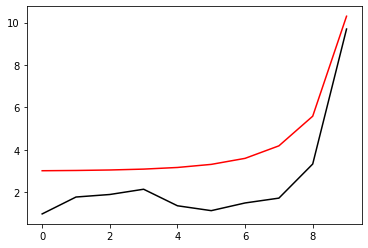

6834 10.518920049587022 -1.1684446479490123 0.783282336614369
[0.97688715 1.77017603 1.88992945 2.13370211 1.35110649 1.11176264
 1.46261886 1.68402495 3.29236752 9.69279896]


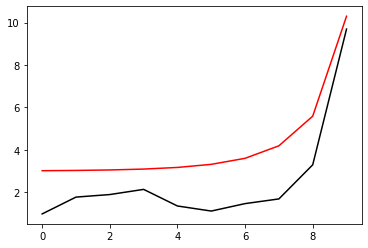

7035 9.721133026273142 -1.1600880157651399 0.7926314457522846
[0.96500619 1.756276   1.87727748 2.1172988  1.33158488 1.08260115
 1.42159552 1.63724703 3.24747032 9.69076114]


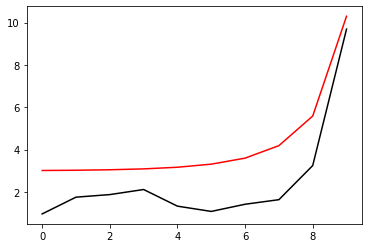

7236 10.002740731712109 -1.1584930334065675 0.7913684651494696
[0.97038027 1.75894837 1.88054863 2.1162164  1.32668893 1.0669062
 1.39151705 1.59716927 3.20484409 9.68881286]


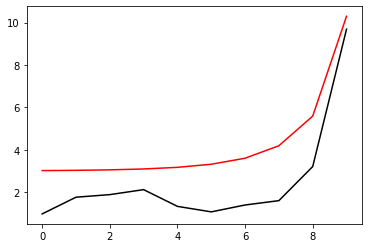

7437 10.003297636728506 -1.1579982864883973 0.7928603504579068
[0.95576147 1.74341587 1.86732508 2.10011995 1.30811879 1.03901372
 1.35185653 1.55122267 3.15965636 9.68673035]


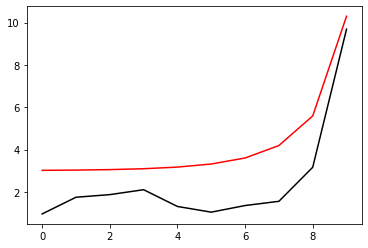

7638 9.991479004555298 -1.1571170255587 0.7899727412349761
[0.95874304 1.74421826 1.86875896 2.09638954 1.29879277 1.01575853
 1.31055031 1.49738852 3.10214176 9.68408367]


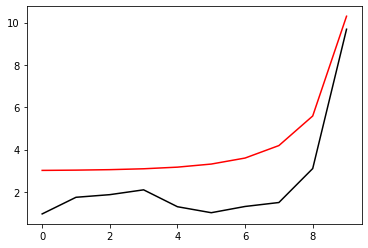

7839 10.002753228814424 -1.1556548545132743 0.7884538732868895
[0.95833765 1.74202609 1.86763403 2.09038122 1.28736969 0.99048058
 1.26780359 1.44327544 3.04528529 9.68146375]


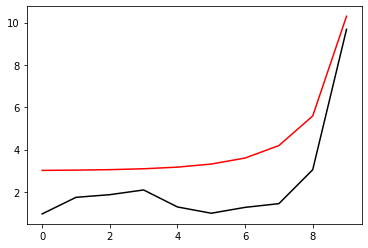

8040 8.991264250719597 -1.151730955482474 0.7864684266029882
[0.96603856 1.74738862 1.87307919 2.08911746 1.27788784 0.96279435
 1.21758217 1.37798831 2.97520519 9.67824204]


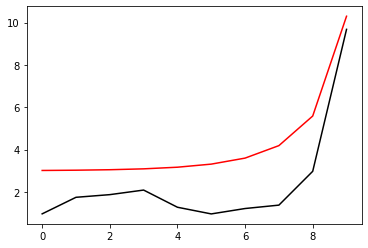

8241 9.022109582716709 -1.1460842155128304 0.7854824870760114
[0.973673   1.75271721 1.87830299 2.08685415 1.26601237 0.93054092
 1.16105874 1.30601362 2.89852115 9.67474147]


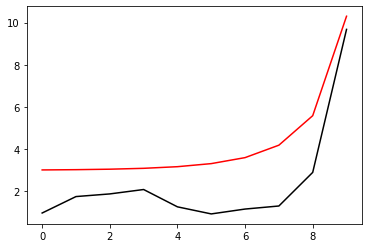

8442 10.002741044935043 -1.1435040500428915 0.7861358462767664
[0.9621707  1.73871345 1.86443921 2.06602373 1.23682823 0.88392567
 1.0964919  1.23372375 2.82735188 9.67148736]


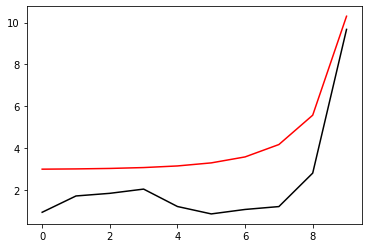

8643 10.071392798948894 -1.142120128442154 0.7820319464125941
[0.96663473 1.74199367 1.86884638 2.06413314 1.22636381 0.85407161
 1.04402786 1.16742773 2.75696737 9.66828497]


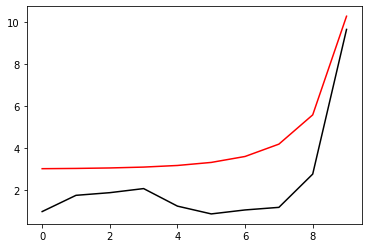

8844 8.224260721610657 -1.1373022003914914 0.7818304656008374
[0.965449   1.73951188 1.86738519 2.05625494 1.20987444 0.81869857
 0.98756361 1.09873906 2.68510783 9.66501266]


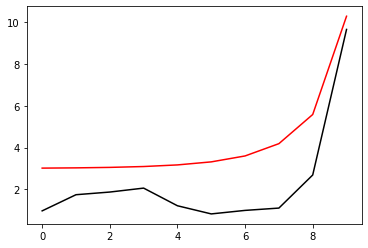

9045 10.150280558060771 -1.1367587380584188 0.7809987721084108
[0.95002011 1.72362412 1.85354645 2.03761199 1.1849331  0.77868186
 0.93130714 1.03414436 2.61976695 9.66201455]


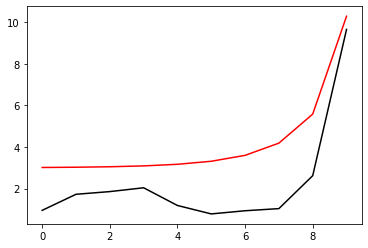

9246 9.939079031104557 -1.1460706806233325 0.7612451142113363
[0.97904217 1.75153051 1.8822893  2.05998266 1.19798297 0.77095394
 0.89718593 0.97973104 2.5550212  9.65902553]


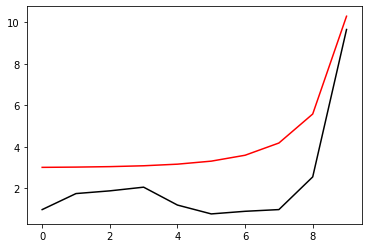

9447 10.002810181456182 -1.1399509936102743 0.7600581728580671
[0.98741031 1.75874246 1.89037849 2.06205593 1.1917624  0.7465967
 0.85122435 0.91889391 2.48812844 9.65596034]


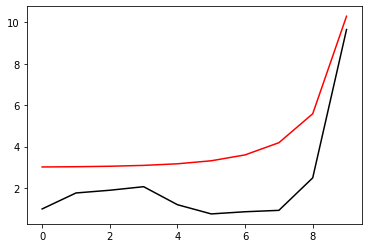

9648 9.475557799389287 -1.1361727842012093 0.7578012300167798
[0.98763711 1.75726488 1.88904268 2.0539244  1.17454608 0.71092371
 0.79504316 0.85037863 2.41612958 9.65265354]


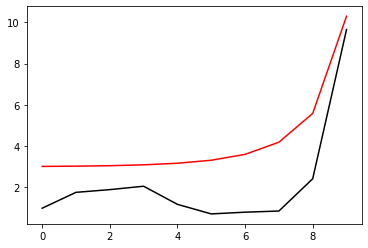

9849 7.910203296112481 -1.131733173586252 0.7564332745493436
[0.98803409 1.75625095 1.88854343 2.04717384 1.15936525 0.67810928
 0.74267014 0.78643862 2.34906075 9.64955846]


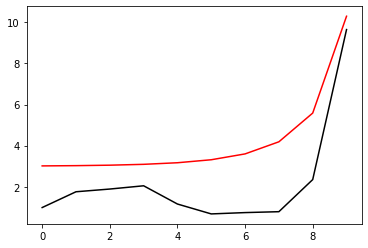

In [213]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%set], Negative[i%set]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 7.141434861328443 -1.104457989685469 0.7465752266869116
[1.0037072  1.76510335 1.89462331 2.03370178 1.11895523 0.60445741
 0.63965946 0.67067772 2.23337379 9.64431401]


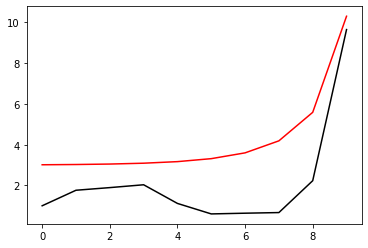

402 11.00289058097444 -1.1019572068410342 0.7465472599599704
[0.99512642 1.75478295 1.88451143 2.01899174 1.098524   0.57102533
 0.59119601 0.61755641 2.18487755 9.64207307]


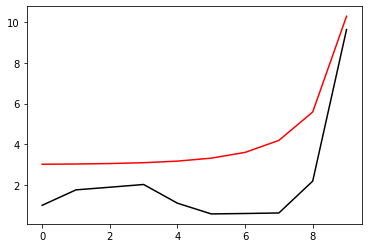

603 9.032824008525028 -1.1016706399711091 0.7432468104722029
[0.99059246 1.74894693 1.87956911 2.01039052 1.08552001 0.54681236
 0.55323703 0.57338834 2.14252719 9.64011986]


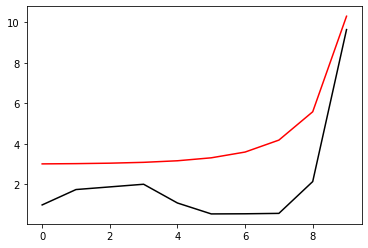

804 10.01032271840996 -1.105842360237497 0.7357302712922305
[0.98544571 1.74336211 1.87591258 2.00438109 1.07682722 0.52936681
 0.52440772 0.53815214 2.10742452 9.63851441]


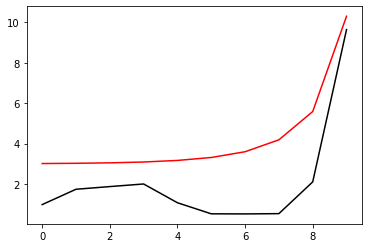

1005 10.002847901319841 -1.1046192522645168 0.7305118719397753
[0.99184524 1.74812839 1.8815022  2.00655509 1.07520751 0.5177376
 0.49929761 0.50331363 2.06980761 9.63679349]


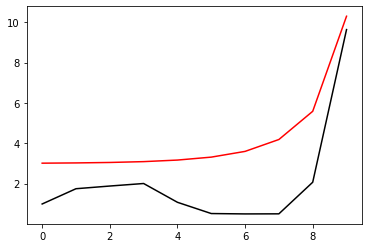

1206 10.002792983368789 -1.1046734523277804 0.7297888225809324
[0.98549673 1.742636   1.87934998 2.00388037 1.07208169 0.50896569
 0.48209254 0.47980333 2.04466851 9.63563999]


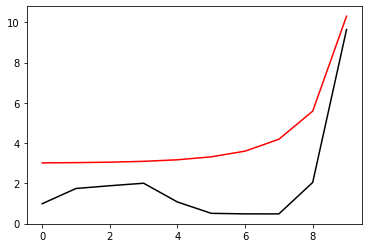

1407 9.99064875197831 -1.1020760042520221 0.7310064190181322
[0.98167419 1.73923005 1.87885151 2.00256437 1.07003591 0.50111015
 0.46558071 0.45643659 2.01900039 9.63445927]


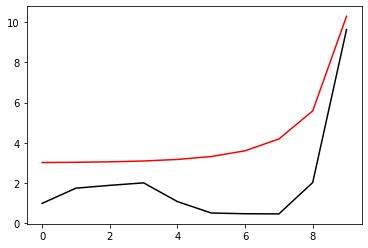

1608 10.009172250108742 -1.1011898970337557 0.7296912253495645
[0.97795485 1.73552371 1.8776087  2.00011432 1.06644839 0.49136995
 0.44680457 0.43039687 1.99045012 9.63314413]


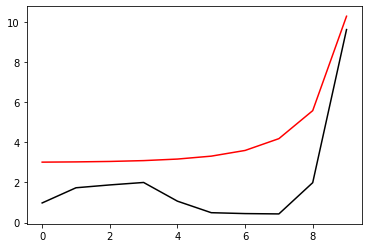

1809 8.956147127844268 -1.0929561788878606 0.7357813334564441
[0.97750924 1.73569657 1.88079527 2.00273197 1.06852683 0.48790684
 0.43446115 0.40981528 1.96578269 9.63201195]


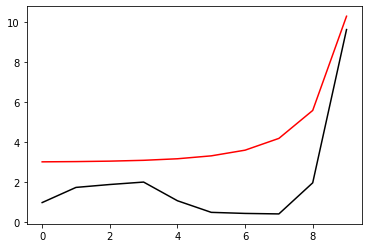

2010 10.624058307466917 -1.088484648089115 0.7352953669463455
[0.98408472 1.7415948  1.88845667 2.00871312 1.07288171 0.48570918
 0.4222302  0.38801285 1.93879242 9.63076668]


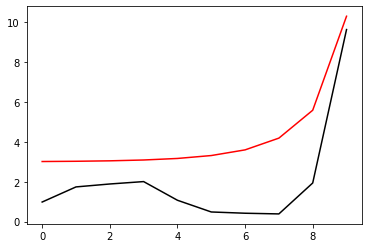

2211 9.966284626679313 -1.0926021103391363 0.7281514034565115
[0.98432137 1.74169747 1.89101818 2.01056949 1.0743785  0.48255041
 0.4116943  0.37056026 1.91788255 9.62980476]


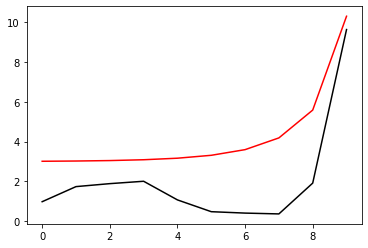

2412 10.003150541546031 -1.0905571605498223 0.7274689555548522
[0.9834344  1.74087801 1.89271714 2.01151137 1.07475519 0.47788765
 0.39903947 0.35030946 1.89373544 9.6287063 ]


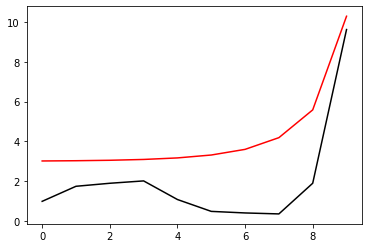

2613 10.063413955124181 -1.0883090203594419 0.7263133638932355
[0.98472548 1.7422803  1.89669057 2.01479328 1.07750577 0.475597
 0.38859667 0.3317615  1.87056367 9.62764427]


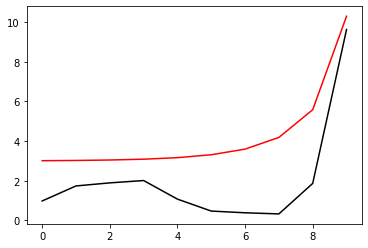

2814 9.031466149309898 -1.087045767841374 0.7244052213176274
[0.98429394 1.74225922 1.89950995 2.01717589 1.07958024 0.47284731
 0.37791277 0.31311548 1.84730205 9.6265812 ]


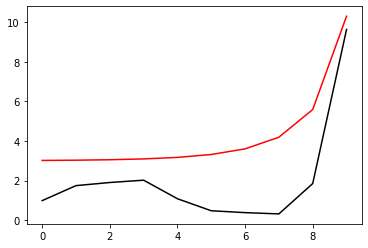

3015 8.039956873648556 -1.0811770513580257 0.7310783059348701
[0.97395601 1.73401149 1.89565206 2.01439976 1.0779847  0.4679883
 0.36683306 0.29569741 1.82639615 9.62562237]


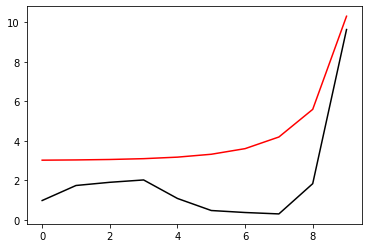

3216 8.467422012883768 -1.0800769107096435 0.729874589921458
[0.97064183 1.73240223 1.89807406 2.01756244 1.08187076 0.46793945
 0.35942942 0.2802489  1.80563307 9.62468295]


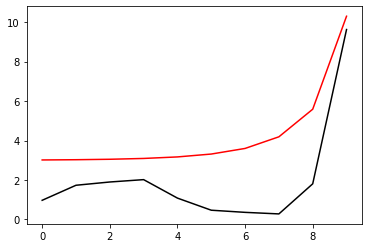

3417 9.277006669263985 -1.0780916640919656 0.7278618914954137
[0.97194838 1.73512268 1.90450916 2.02437595 1.08893258 0.47042754
 0.3536707  0.26529927 1.78420283 9.62370116]


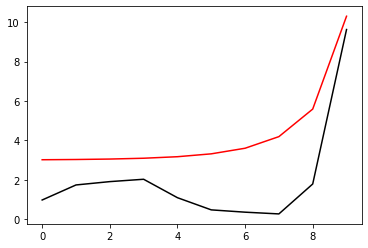

3618 8.185528673787275 -1.0768901905050452 0.7245509055918935
[0.9738826  1.73885274 1.91225837 2.03266428 1.09745638 0.47414763
 0.3487079  0.25054531 1.76232599 9.62271461]


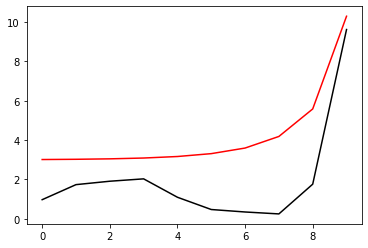

3819 8.978418114310106 -1.0756546166071288 0.7191578133571684
[0.98099212 1.74752982 1.92459571 2.0449603  1.10914192 0.47983339
 0.34416798 0.23454333 1.73774027 9.62160593]


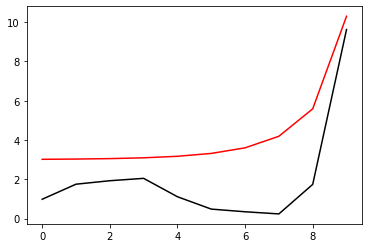

4020 9.12518195669372 -1.0727710360160523 0.7181921272009345
[0.97775237 1.74708029 1.92885204 2.04997073 1.11413022 0.4791654
 0.33363908 0.21326757 1.70884751 9.62027518]


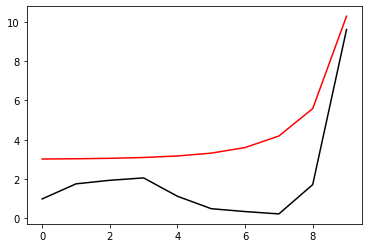

4221 8.024596177869546 -1.0683027347218417 0.717966333813948
[0.97477316 1.7471136  1.93366397 2.05537972 1.11906594 0.47756252
 0.32092903 0.18856133 1.67558738 9.61873988]


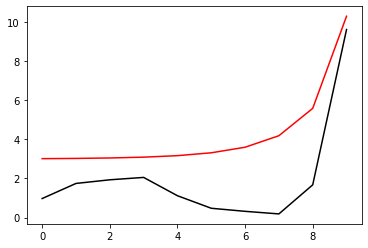

4422 10.003063297122386 -1.0670418795834649 0.7100223724209522
[0.98494878 1.75911195 1.94924718 2.07022177 1.13184249 0.48177635
 0.31153246 0.16453315 1.64075789 9.61714418]


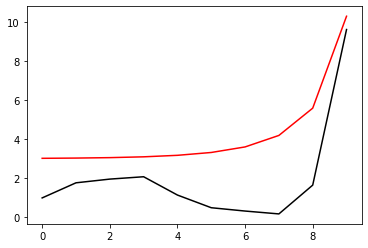

4623 10.998318371910482 -1.0582323484177605 0.7072642343405511
[1.00668598 1.78243235 1.97573295 2.09527738 1.15361613 0.49302841
 0.30641185 0.14186533 1.60511465 9.61549749]


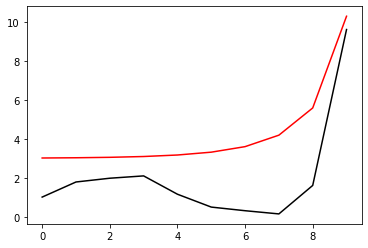

4824 11.00328147019712 -1.0515795470415694 0.7024589233143246
[1.01480043 1.79224402 1.98811487 2.10458161 1.1570885  0.48219542
 0.27536932 0.09176975 1.54314014 9.61265963]


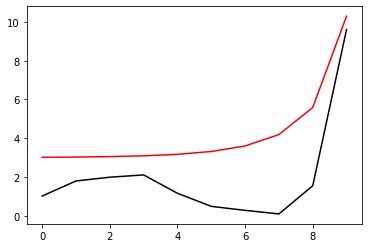

5025 8.003157177691845 -1.0448003534805117 0.7002187582084507
[1.01271307 1.79268064 1.99198268 2.10595871 1.15300944 0.46371635
 0.23694813 0.03594102 1.47777015 9.60965822]


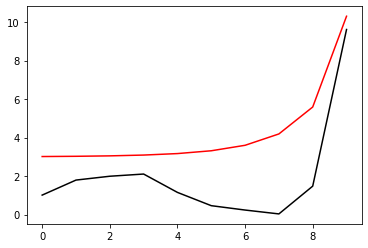

5226 9.279010882598108 -1.0401909783350851 0.6945211690107448
[ 1.01403996  1.79608165  1.99848886  2.10957422  1.15063618  0.44599357
  0.19829913 -0.0204505   1.41190267  9.60665336]


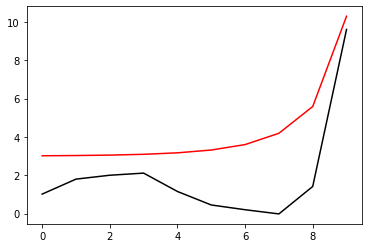

5427 6.993759840626221 -1.037317099852756 0.6931422646044911
[ 0.99903983  1.7846655   1.9921381   2.10287592  1.14123118  0.42538389
  0.16167024 -0.07024234  1.35590098  9.60409043]


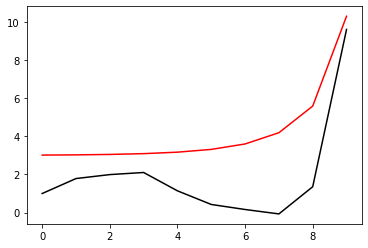

5628 8.967023997903347 -1.0331911316618718 0.6915700863080501
[ 0.99122673  1.78055071  1.99344038  2.10456827  1.14109291  0.41482741
  0.13492784 -0.11167215  1.30622304  9.60181241]


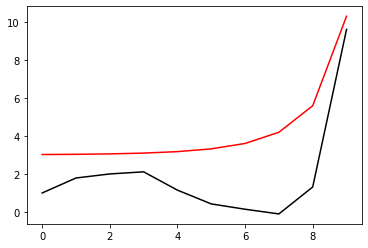

5829 9.00305995258236 -1.0292171702666053 0.6885096702135061
[ 0.98842916  1.78074797  1.99846809  2.10961742  1.14415839  0.40765167
  0.11167663 -0.15011678  1.25863789  9.59964099]


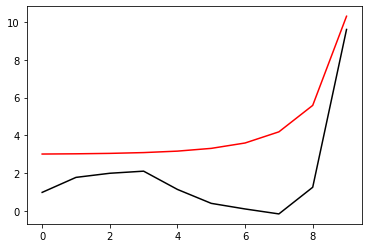

6030 8.908321860306037 -1.027441341524723 0.6809235718344846
[ 0.99714863  1.79318813  2.01660912  2.12882958  1.16232114  0.41623368
  0.10369104 -0.17559319  1.2209446   9.59791511]


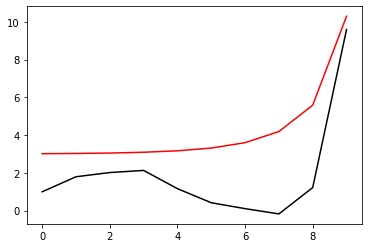

6231 10.05107507272536 -1.0238513613282378 0.6719163698547331
[ 1.0214065   1.81976789  2.04749512  2.15944134  1.1904798   0.43356288
  0.10321561 -0.19502767  1.18783951  9.59640084]


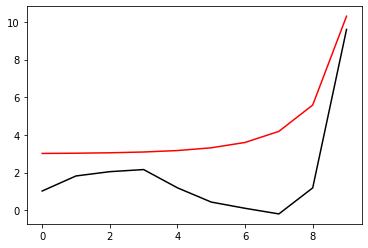

6432 10.007764812439346 -1.0180997448078275 0.6711586451050948
[ 1.03027202  1.83022317  2.06185372  2.1736036   1.20317191  0.43786378
  0.09418632 -0.21719289  1.15742154  9.59500645]


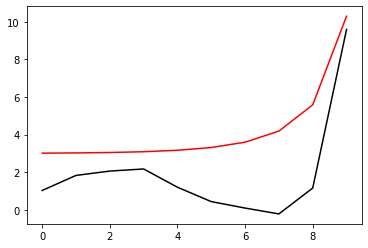

6633 5.470018535481968 -1.0209589611938776 0.6616693845239426
[ 1.03615624  1.83718814  2.07226104  2.18346397  1.2114275   0.43789928
  0.08149464 -0.24195994  1.12558814  9.59355772]


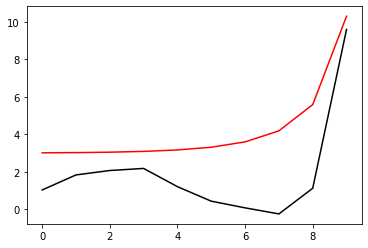

6834 7.263193636261316 -1.0178622191218798 0.6557912838060261
[ 1.05033834  1.85213131  2.09025002  2.20052901  1.22638256  0.44381692
  0.0731113  -0.26454099  1.09403223  9.59211734]


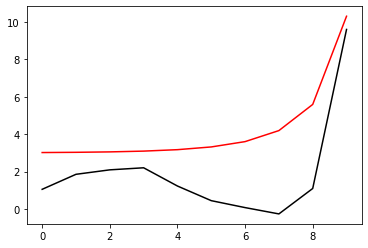

7035 9.002760980518026 -1.0178489117382057 0.6465864230105788
[ 1.06581925  1.86853027  2.10986435  2.21955553  1.24369219  0.45250796
  0.06755906 -0.28470025  1.06454127  9.59078179]


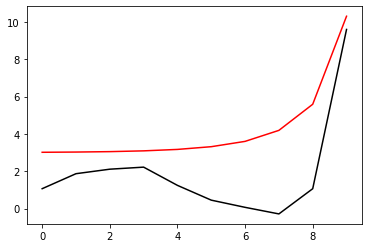

7236 11.263544378298874 -1.018875025778099 0.6344845374211424
[ 1.08395248  1.88686321  2.13042089  2.23842459  1.25957966  0.45846371
  0.05792712 -0.30997401  1.02954554  9.58916709]


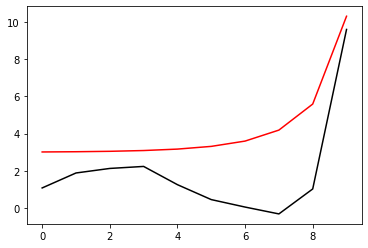

7437 9.106683452686422 -1.0121244348420435 0.6326292412208194
[ 1.09002234  1.89274507  2.13788454  2.24314028  1.26013048  0.44778339
  0.03110933 -0.35115519  0.9810884   9.58692607]


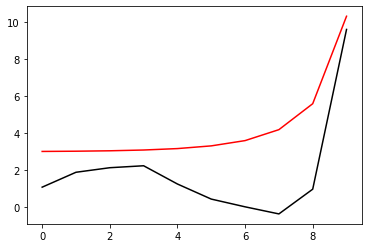

7638 9.063472637620189 -1.0125674114804557 0.6237577127094999
[ 1.09719652  1.90142606  2.15009395  2.25481981  1.2700234   0.4487729
  0.01749061 -0.37927318  0.94439253  9.58523473]


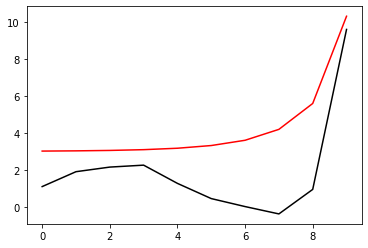

7839 9.273901743325293 -1.0088866728354202 0.6148143399399073
[ 1.12166408  1.92523078  2.1755019   2.27817049  1.29025403  0.45903039
  0.01186826 -0.40123507  0.91193166  9.583727  ]


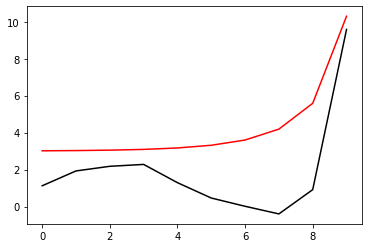

8040 9.003850488459088 -1.0089534081090576 0.5994367228832652
[ 1.15250401  1.95563951  2.20767003  2.30845302  1.31744392  0.47607945
  0.01226249 -0.4188004   0.88203266  9.58237176]


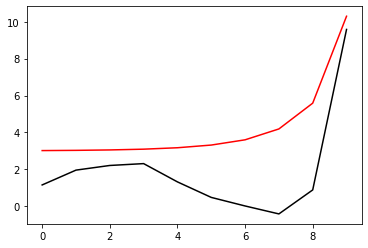

8241 8.827131244034561 -1.0076301242580536 0.5887720566690923
[ 1.17752504  1.98104721  2.23559005  2.33522759  1.34189402  0.49136296
  0.01223355 -0.43534931  0.85426347  9.58108062]


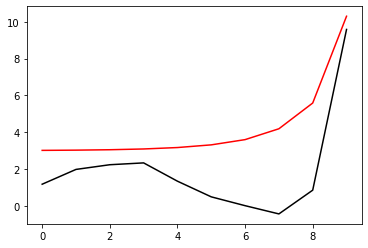

8442 11.74717457164883 -0.9931277818050916 0.5896881850571244
[ 1.20653433e+00  2.00983051e+00  2.26581196e+00  2.36264457e+00
  1.36463522e+00  5.01566391e-01  2.97414548e-03 -4.64460920e-01
  8.12430840e-01  9.57917591e+00]


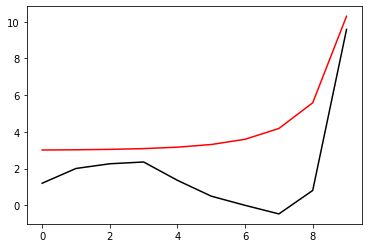

8643 8.465788551921268 -0.9832216313451407 0.5776038925151414
[ 1.25191432e+00  2.05424813e+00  2.31046598e+00  2.40258344e+00
  1.39685220e+00  5.16149559e-01 -9.37666267e-03 -5.03981788e-01
  7.55579121e-01  9.57657895e+00]


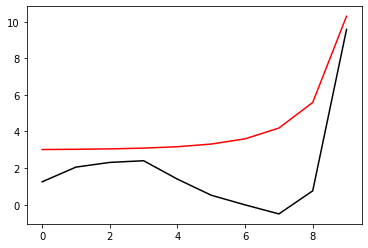

8844 7.3248542041956926 -0.960031479944654 0.57326489414507
[ 1.31010768  2.11092708  2.36644432  2.45244379  1.43670629  0.53427289
 -0.02456242 -0.55240619  0.68619977  9.57338121]


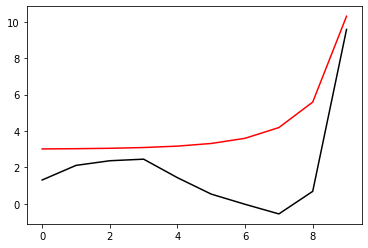

9045 8.942818175208389 -0.9452158415525693 0.5580088382992615
[ 1.37350234  2.17404742  2.43073301  2.51344284  1.49128294  0.57106714
 -0.01895874 -0.58126599  0.63369646  9.57102601]


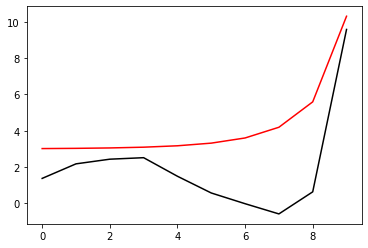

9246 10.003834677557373 -0.9124093991855283 0.5508657022579504
[ 1.45975087e+00  2.26108143e+00  2.51986970e+00  2.60049755e+00
  1.57278539e+00  6.34205909e-01  7.31788059e-03 -6.00440135e-01
  5.80693980e-01  9.56857536e+00]


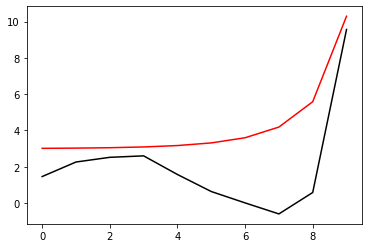

9447 11.996480070482571 -0.8686601788523658 0.5334384936829722
[ 1.57892123  2.38295229  2.64566573  2.72661797  1.69559583  0.73983313
  0.07062272 -0.59898457  0.53030757  9.56626713]


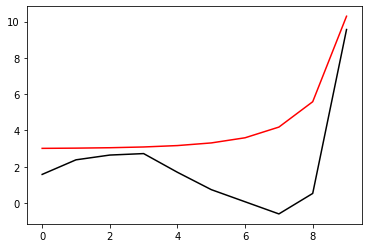

9648 5.273185581679926 -0.7532851715660773 0.56588773501613
[ 1.74881144  2.55410741  2.81956899  2.9013201   1.86880803  0.90068269
  0.19301943 -0.54825716  0.50945448  9.56534605]


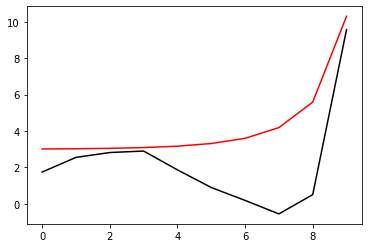

9849 2.0037851749091353 -0.6407690981672317 0.6313475788603792
[ 1.82945436  2.63248283  2.89854617  2.98034202  1.9491677   0.97926394
  0.26166069 -0.5042044   0.52315596  9.56594379]


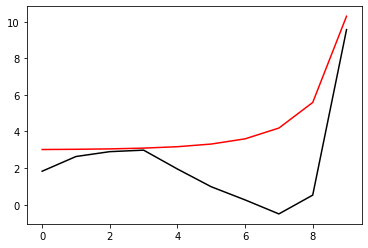

In [214]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%set], Negative[i%set]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 0.033268935700730126 -0.6328194923615276 0.6688229288280915
[ 1.76916117  2.57767727  2.85811008  2.95427552  1.94383986  0.99435521
  0.2995341  -0.44371621  0.60152166  9.5694576 ]


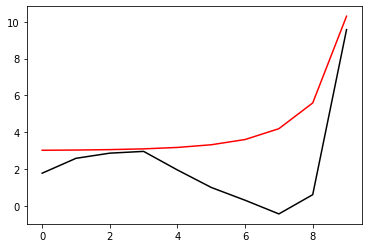

402 0.0440793957094341 -0.6426088635022842 0.6834571192077196
[ 1.73830385  2.55176392  2.84460338  2.95470838  1.96274685  1.03062342
  0.35292488 -0.37411391  0.68541056  9.57334924]


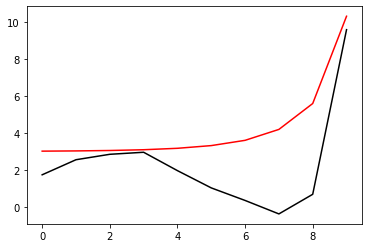

603 0.4600959245606098 -0.6579132941750084 0.6888350500070096
[ 1.72146342  2.54019533  2.84542869  2.96922889  1.99504641  1.07909491
  0.41652663 -0.29738849  0.77209989  9.5773202 ]


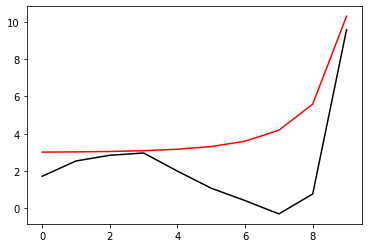

804 0.007721216279393522 -0.6650202699588686 0.6951037819638147
[ 1.72052131  2.54498432  2.86287368  2.99992893  2.04228387  1.14044591
  0.49028186 -0.21374833  0.86217043  9.58146092]


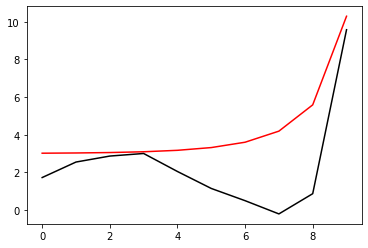

1005 2.0091579306371714 -0.669025869421717 0.697520362715771
[ 1.73505567  2.56444612  2.89358127  3.04166607  2.09767501  1.20679525
  0.56589831 -0.13113794  0.94865631  9.58544573]


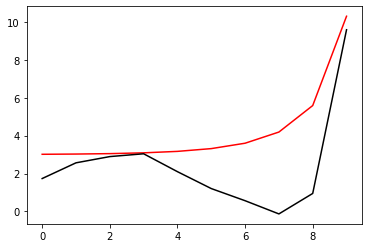

1206 0.056665030854213455 -0.6747315216222278 0.7022935238036795
[ 1.73574436  2.56966099  2.90960983  3.06825037  2.13767704  1.25793811
  0.62713174 -0.06132404  1.02464722  9.58893111]


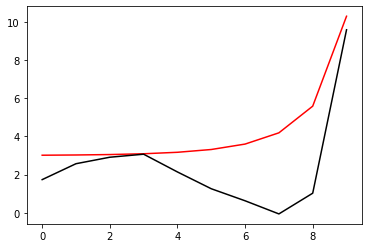

1407 0.025654234561265813 -0.6787491554698184 0.707768653121603
[1.73810979e+00 2.57629434e+00 2.92674663e+00 3.09541562e+00
 2.17766567e+00 1.30846125e+00 6.87262588e-01 7.10728951e-03
 1.09918123e+00 9.59234519e+00]


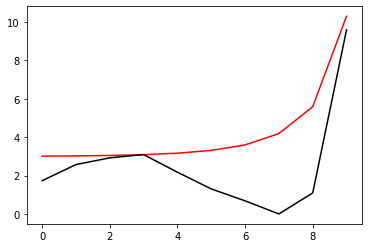

1608 3.4832960056876123 -0.684540842786401 0.7139620802872848
[1.73242031 2.57483568 2.93595937 3.11483984 2.2102897  1.35207093
 0.74110939 0.07010703 1.16935959 9.59555247]


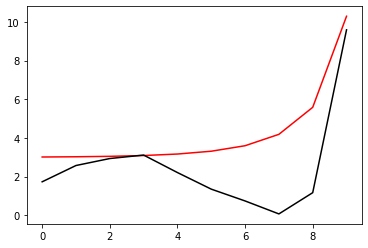

1809 2.1456759031117976 -0.6916260232620942 0.7217829484413504
[1.7175461  2.56419579 2.93615253 3.12574473 2.23524975 1.38912168
 0.78970505 0.12929859 1.23720493 9.59864647]


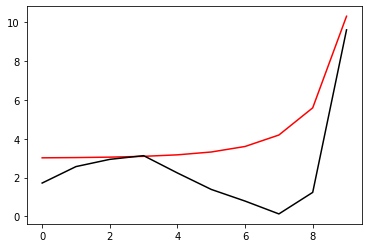

2010 2.018827345190904 -0.696940568442218 0.7261194307090738
[1.71555953 2.56559299 2.9473037  3.14625991 2.26826953 1.43256568
 0.84292031 0.19122472 1.30574762 9.60177258]


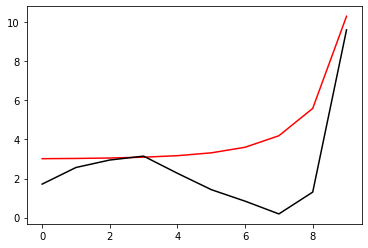

2211 1.0104367230228277 -0.7020785445649014 0.7304007566851813
[1.71387624 2.5674951  2.9591697  3.16766011 2.30229953 1.47713496
 0.89738044 0.25452103 1.37576329 9.604972  ]


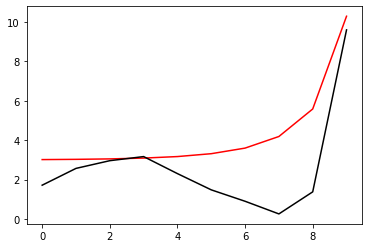

2412 3.9853963284708755 -0.7065550118814924 0.7339598465648575
[1.72098123 2.57963949 2.98273418 3.20213506 2.35044218 1.53664825
 0.96738613 0.3336929  1.46172986 9.60890455]


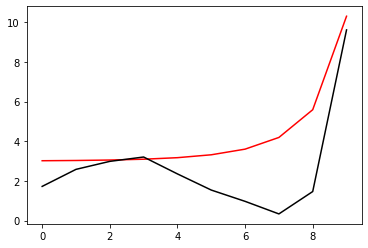

2613 0.02002015055802598 -0.7135186488721375 0.7403559145740692
[1.71412809 2.58012311 2.99714545 3.2302131  2.39490187 1.59514872
 1.03892477 0.41675844 1.5537724  9.61311314]


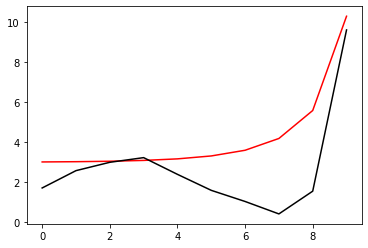

2814 0.007688274429318357 -0.7222533159107198 0.744133656894803
[1.7128742  2.58660905 3.01804254 3.26537658 2.44686336 1.66146272
 1.11838083 0.50757993 1.65320722 9.61766195]


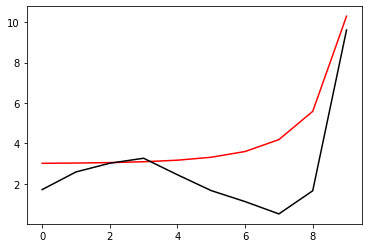

3015 0.00792691642035446 -0.7316941083260236 0.7518093416365486
[1.70194326 2.58550198 3.03362538 3.29810839 2.4992334  1.73101949
 1.20370093 0.60659508 1.76298509 9.62271351]


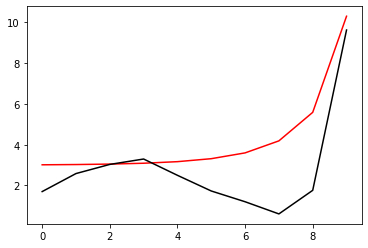

3216 0.9984511791900395 -0.7377159230214237 0.7577752587192012
[1.69674542 2.58660399 3.04717857 3.32437042 2.54073637 1.78561646
 1.27026391 0.68350579 1.84782402 9.62662808]


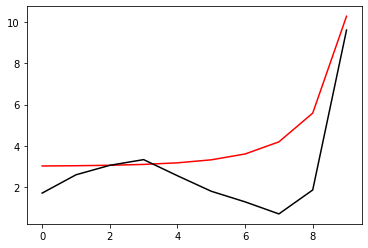

3417 1.0587060814054245 -0.7419778901477141 0.7622928667736825
[1.69453978 2.58888529 3.05969182 3.34693709 2.57578304 1.83090068
 1.32468638 0.7456743  1.91566432 9.62974673]


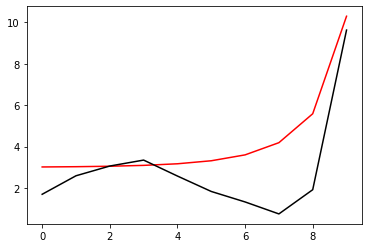

3618 0.007448586505973698 -0.7473534176290397 0.7677514489977504
[1.68256304 2.58192208 3.06327639 3.36067066 2.60201162 1.86721743
 1.36989594 0.79843136 1.97404071 9.63241932]


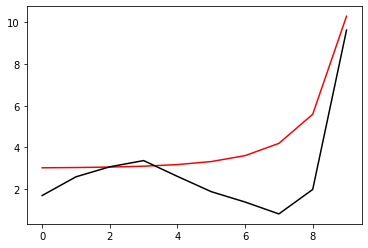

3819 0.9782027198781826 -0.7515998036055288 0.7718178309771875
[1.67718526 2.58114262 3.07223312 3.37892163 2.63177395 1.90608363
 1.41662292 0.85168217 2.03193502 9.63506516]


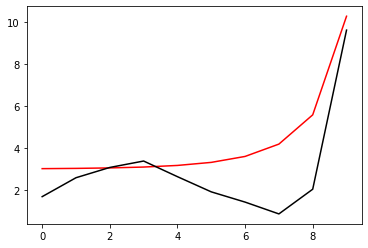

4020 0.9862524445671834 -0.7549880008162502 0.7756411219792353
[1.6732027  2.58117084 3.08119011 3.39641189 2.66006594 1.94288423
 1.46077512 0.90196364 2.0865525  9.63755957]


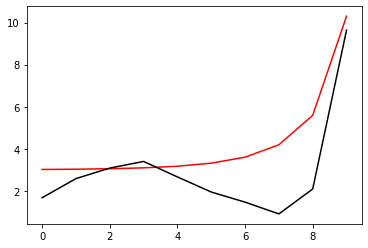

4221 1.5945432188152913 -0.75816206498391 0.7795082041583672
[1.66843798 2.5799896  3.08838425 3.41171353 2.68586794 1.97704277
 1.50223003 0.94958358 2.13858717 9.63992388]


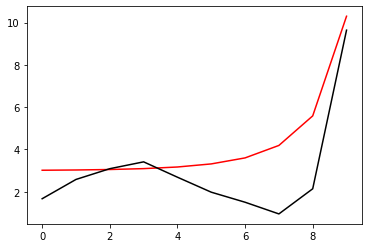

4422 0.008332729180183948 -0.7617984014725095 0.7825468124145528
[1.66307076 2.57752562 3.0935099  3.42421878 2.70828701 2.00738983
 1.5395937  0.99298625 2.18636933 9.6420987 ]


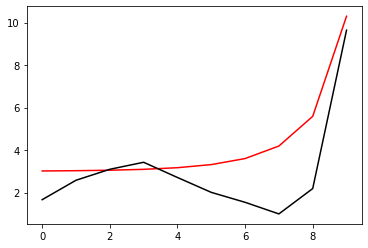

4623 0.007260520934925039 -0.7647479221168395 0.7850298200375048
[1.65993758 2.57651377 3.09926307 3.43642744 2.72956043 2.03578923
 1.57432218 1.03321501 2.23053755 9.64411433]


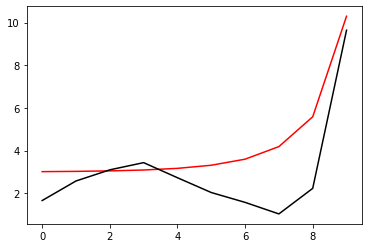

4824 0.017869206678983143 -0.766929742103441 0.7872686301884925
[1.65947141 2.57773839 3.10687299 3.44999473 2.75173595 2.06460661
 1.60903951 1.07309354 2.27407427 9.64611076]


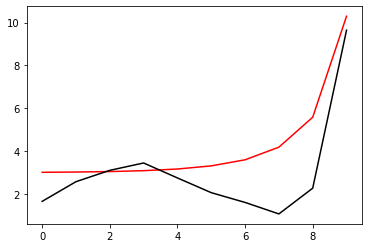

5025 0.012744377788460978 -0.7693221468023781 0.7892541957065398
[1.65972675 2.57952382 3.11499234 3.46395966 2.77425717 2.09371405
 1.64406054 1.11338971 2.31822007 9.64814156]


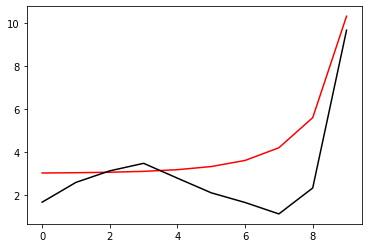

5226 0.009194669835098455 -0.7724842355468657 0.7914189178506218
[1.65872362 2.58020926 3.12231252 3.47742816 2.7966513  2.12308107
 1.67980293 1.15497077 2.36430883 9.65026255]


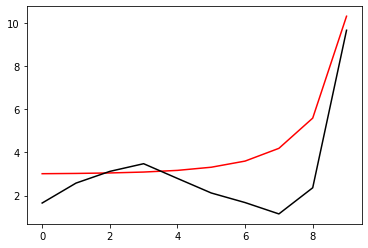

5427 0.0066758749319078495 -0.7770263233633636 0.794885771570205
[1.65259639 2.57648042 3.12611329 3.48838395 2.81763291 2.15215748
 1.71641426 1.19862157 2.41371098 9.6525308 ]


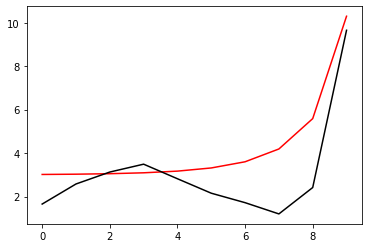

5628 0.004333996481858581 -0.7859994137616222 0.7952081000287123
[1.64740101 2.57450146 3.13282626 3.50376449 2.8447389  2.18914977
 1.76273025 1.25361703 2.47586035 9.65538772]


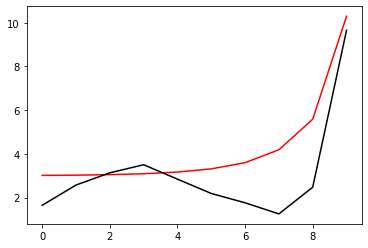

5829 0.004967851121570894 -0.7887627788551181 0.7947534408994404
[1.66068611 2.58967008 3.15508666 3.53295737 2.8837492  2.23614734
 1.81712751 1.31470488 2.5420489  9.65843033]


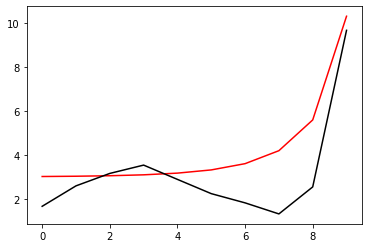

6030 2.627853313174449 -0.7946976353935733 0.7987471976811242
[1.65168802 2.58422444 3.15838947 3.5453041  2.90830876 2.27142039
 1.86263993 1.36969805 2.60475238 9.66127577]


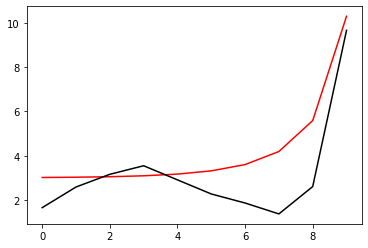

6231 0.0042904765216411015 -0.8007702735136251 0.8046236316600515
[1.63388362 2.56988659 3.15236395 3.54819234 2.92344522 2.29771282
 1.899813   1.4170863  2.66057897 9.66381916]


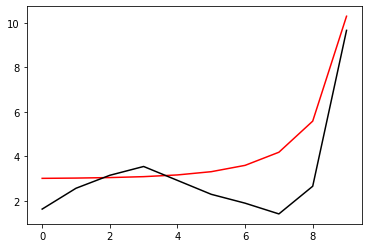

6432 1.004944708553612 -0.797820462064994 0.8104822729678901
[1.63901055 2.57725575 3.16637463 3.56909172 2.95416023 2.33688319
 1.94690828 1.47128791 2.72013078 9.66655219]


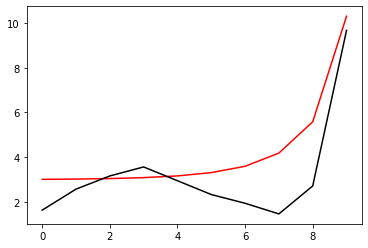

6633 0.004555101305245107 -0.799789618288838 0.8107480698904899
[1.64688681 2.58678513 3.18200331 3.59101261 2.98537134 2.37602904
 1.9934947  1.52451271 2.77819525 9.66920185]


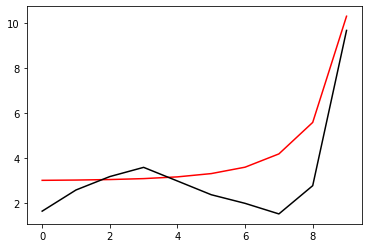

6834 0.0049804291415570506 -0.8021600782600573 0.8135945368612765
[1.64576807 2.58739335 3.18895766 3.60460942 3.00882032 2.40813208
 2.03396106 1.57273216 2.83246817 9.67168598]


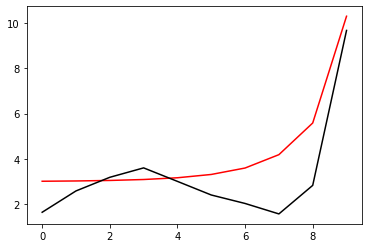

7035 0.0049674060777826845 -0.8051302006423591 0.8151980339870692
[1.64444977 2.58735318 3.19464173 3.61607635 3.02917035 2.43608315
 2.0692387  1.61486086 2.87989237 9.67386531]


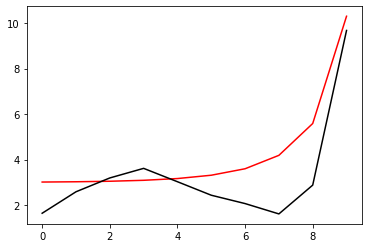

7236 0.005049133254398946 -0.8070388097447643 0.8177879404976854
[1.64091914 2.58463073 3.19696197 3.62324215 3.04417151 2.45755205
 2.09692832 1.64848143 2.91809666 9.67562443]


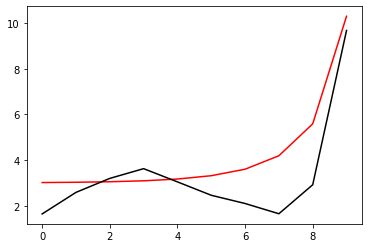

7437 1.0053684427366747 -0.8086622639280592 0.8210334989716617
[1.63552132 2.57998415 3.19721744 3.62810283 3.05660523 2.47617314
 2.12153752 1.6789213  2.95313885 9.67724029]


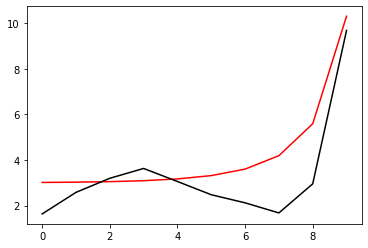

7638 1.0046131894345622 -0.8099077475827342 0.8229518193668984
[1.63453588 2.57959314 3.2014569  3.63658499 3.07221744 2.49746993
 2.14826954 1.71091441 2.98913764 9.67889551]


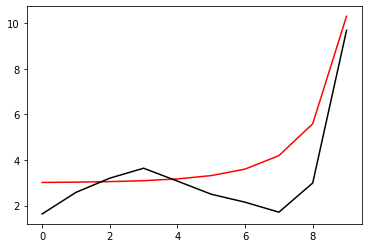

7839 1.009411884483441 -0.810743153365379 0.8242541219111934
[1.63616218 2.58154141 3.20771525 3.64669473 3.0890367  2.51953811
 2.17535944 1.74292527 3.02487059 9.68053685]


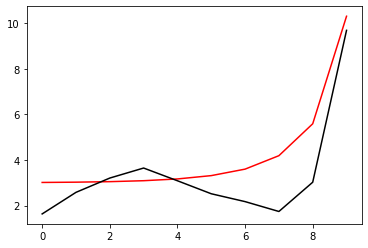

8040 0.026636875349084675 -0.8117115929336673 0.8256860481144103
[1.63705784 2.58268354 3.21310935 3.65588451 3.10492063 2.54071153
 2.20169353 1.77446349 3.06052664 9.682172  ]


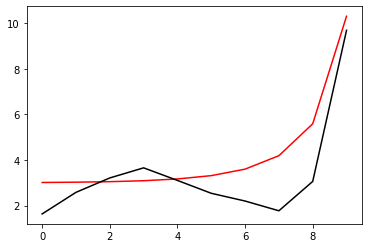

8241 0.00887303230276199 -0.8128904515392439 0.827247710529792
[1.637281   2.58312298 3.2178027  3.66439411 3.12019551 2.56140696
 2.22777734 1.80611387 3.09676156 9.68383307]


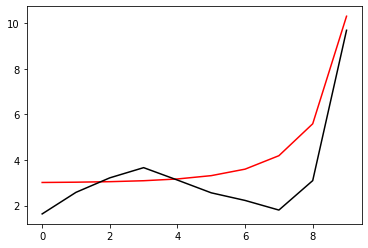

8442 0.013374017779803578 -0.8142939456527908 0.8289092871769503
[1.63717691 2.58324449 3.222234   3.67273361 3.13545291 2.58230257
 2.25437279 1.83870518 3.13444886 9.68556039]


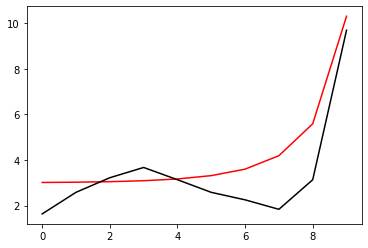

8643 0.01036613621512294 -0.8159208588495419 0.8307690814814559
[1.63684923 2.58321471 3.22664303 3.6812429  3.15114467 2.60398096
 2.28220129 1.87308687 3.17454338 9.68739717]


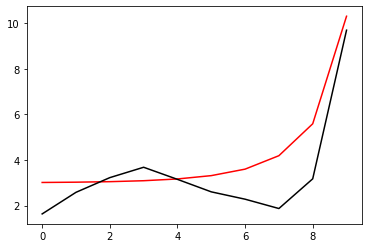

8844 0.007966646519898542 -0.8181153051349719 0.8327310076616765
[1.63594477 2.58276508 3.23083481 3.68983039 3.16728355 2.62658879
 2.31155777 1.90969798 3.21761232 9.68936715]


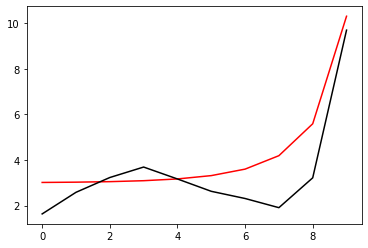

9045 0.008357566086090925 -0.8212069052075004 0.8342868252778193
[1.63481939 2.58231448 3.23521003 3.69888959 3.18420017 2.65041753
 2.34268916 1.94872337 3.26377038 9.69147483]


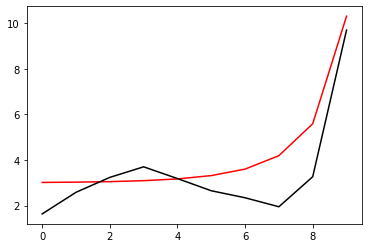

9246 1.0065172056366414 -0.8235920631698574 0.8360654922016314
[1.63524034 2.58345299 3.24103869 3.70931624 3.20229714 2.67534144
 2.37487654 1.98880305 3.31102296 9.69363323]


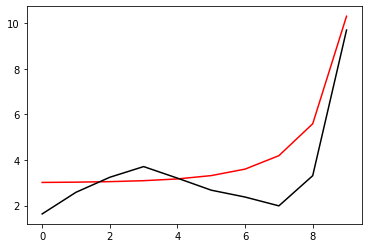

9447 1.0109406082057537 -0.8255375076133505 0.8379519181637162
[1.6359956  2.58483717 3.24683551 3.71942545 3.21966932 2.69917448
 2.40561112 2.02710193 3.35624899 9.69570213]


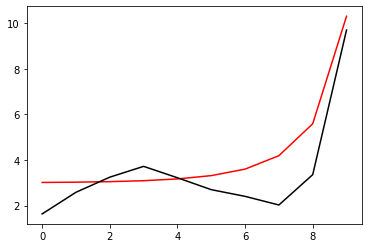

9648 0.14690837885678665 -0.8269990150837943 0.8397991055419918
[1.63732645 2.58664952 3.25277733 3.72935062 3.23642862 2.72194871
 2.43480862 2.06339546 3.39906273 9.697649  ]


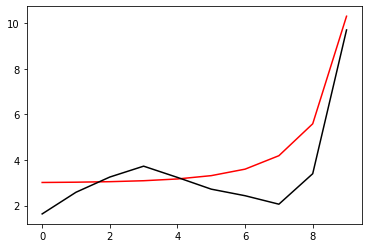

9849 0.009284576202117449 -0.8286491718256462 0.8412201568383514
[1.63842882 2.5881007  3.25814605 3.73843834 3.25202684 2.74320538
 2.46210572 2.09743135 3.43932942 9.69948483]


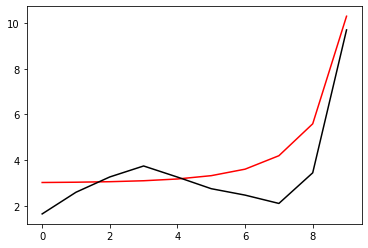

In [215]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%set], Negative[i%set]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 0.004922139792359479 -0.8346072728885681 0.8422186927275104
[1.63264109 2.58027546 3.25814213 3.74652223 3.27476961 2.77719771
 2.50810843 2.15748906 3.51270144 9.70283827]


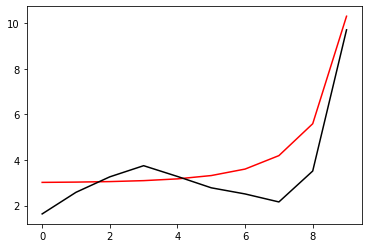

402 0.00488352987212193 -0.8365298022512263 0.842888389394929
[1.63408454 2.58198069 3.26360722 3.75567382 3.29059831 2.79919582
 2.53712963 2.19485565 3.55810482 9.70489622]


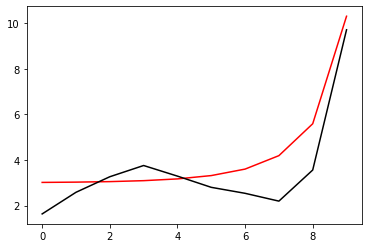

603 0.00532279511641468 -0.838208618467748 0.8446045874446481
[1.63512438 2.58327737 3.26855141 3.76425841 3.30576645 2.82054144
 2.56556662 2.23174751 3.60319377 9.70696352]


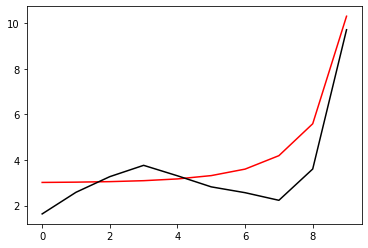

804 0.0053652090203262165 -0.8398453581279928 0.8464996446055202
[1.63610516 2.58449444 3.27333508 3.7726255  3.32063325 2.84152997
 2.59357882 2.26809054 3.64750955 9.70900811]


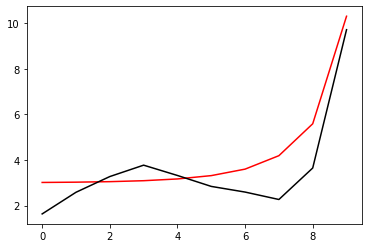

1005 1.004797975061538 -0.8413788955521716 0.8483384784148588
[1.63731971 2.58589194 3.27822537 3.78101978 3.33543575 2.86234181
 2.62125372 2.30385335 3.69088417 9.7110151 ]


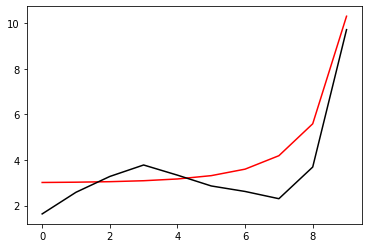

1206 0.0057718152244853015 -0.8427950715343989 0.8501642170598214
[1.63867675 2.58735061 3.28310219 3.7892998  3.35001903 2.88277537
 2.64832273 2.33870068 3.73294785 9.71296001]


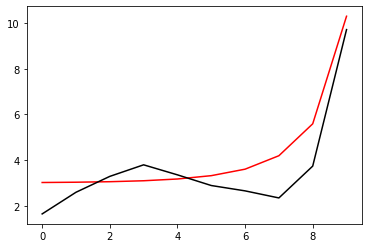

1407 0.005521822416175895 -0.8441555955549107 0.8521227996601113
[1.6398278  2.58851686 3.28762813 3.79713486 3.36406937 2.90251861
 2.67447293 2.37233503 3.77345849 9.71483101]


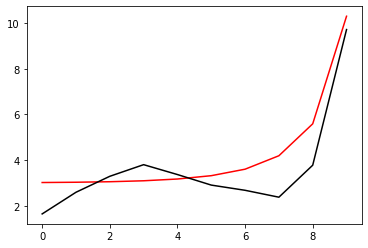

1608 2.0055832483297635 -0.845461945916198 0.8538753459075084
[1.64120734 2.58984428 3.29226742 3.80499971 3.37805935 2.92203855
 2.70015862 2.40519487 3.81285325 9.71664756]


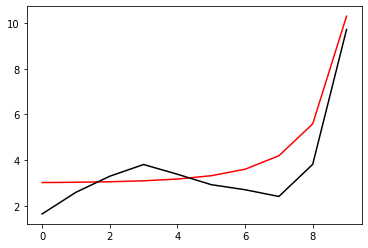

1809 1.0053622352855422 -0.8468785176580799 0.8554504267161033
[1.64232874 2.59090107 3.29657351 3.81246165 3.39151885 2.94088038
 2.72497885 2.43699059 3.8510794  9.71840413]


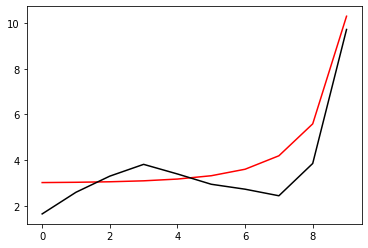

2010 0.005171674709515981 -0.8484455641113842 0.8571092622278228
[1.6426724  2.59125942 3.30019571 3.819282   3.40432264 2.95908432
 2.74918703 2.46822885 3.88892615 9.72013502]


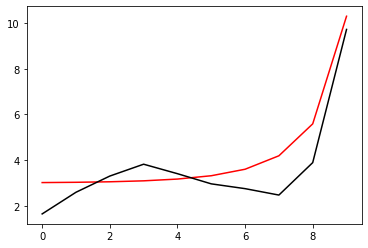

2211 1.0074704372688794 -0.8489547689407186 0.8619137680410776
[1.63829845 2.58846926 3.30214964 3.82602759 3.41868218 2.98066717
 2.77881585 2.50712573 3.9368081  9.72231303]


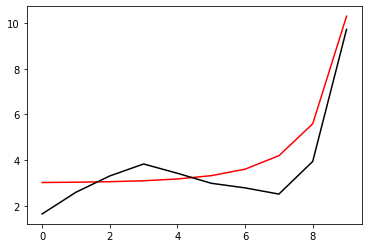

2412 0.9677542873663336 -0.8510544750815399 0.8614978313882535
[1.63913349 2.58930464 3.3059781  3.83276764 3.43093766 2.99780998
 2.80129223 2.53576873 3.9710688  9.72387435]


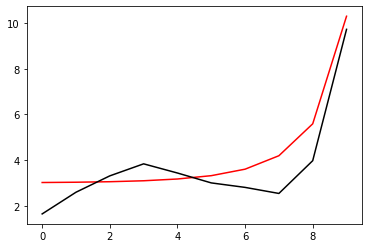

2613 0.005635213347499397 -0.8540390921835931 0.8599060181377232
[1.64334109 2.5933826  3.31306988 3.84302551 3.44713656 3.01958071
 2.8293398  2.57112805 4.01326365 9.72578674]


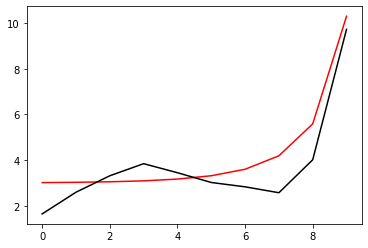

2814 0.008870392937291456 -0.8533700931482789 0.8641572162369051
[1.64064964 2.59096092 3.31386101 3.84710742 3.45717089 3.03515114
 2.85108969 2.60007283 4.0489575  9.72741058]


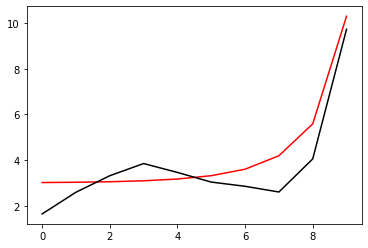

3015 0.00771931704130287 -0.8548923401320997 0.8656558656863336
[1.63872395 2.58910218 3.31501822 3.85130471 3.46704789 3.05022618
 2.87195481 2.62772854 4.08297357 9.72896244]


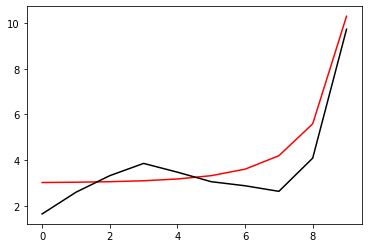

3216 0.6369890276458575 -0.8579669332126393 0.8662334855974763
[1.63598786 2.5866005  3.3157769  3.85542909 3.47727146 3.06618134
 2.89438433 2.65779425 4.12034173 9.73066963]


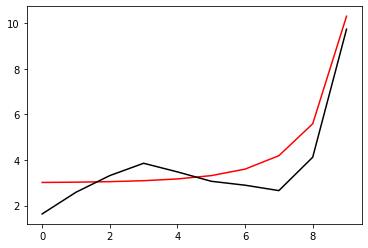

3417 0.013018569174193691 -0.857035733983697 0.8695365120260122
[1.63677833 2.58750593 3.31974089 3.86249544 3.49009627 3.0843256
 2.91848125 2.68885803 4.15783086 9.73237049]


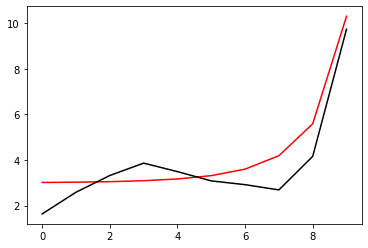

3618 0.00473316335366263 -0.8621266487700536 0.8604403985726357
[1.65558993 2.60520214 3.33890567 3.88314733 3.51467245 3.1122916
 2.95008137 2.72437846 4.19571794 9.73416741]


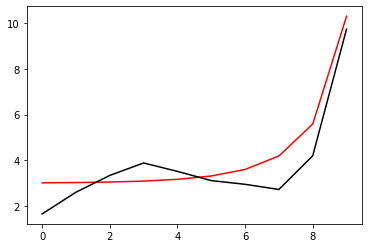

3819 0.011630611702316142 -0.8583601179822699 0.8709926649120204
[1.64013295 2.59066616 3.32794101 3.87610535 3.51431378 3.11864873
 2.96417667 2.74750439 4.22728029 9.73558491]


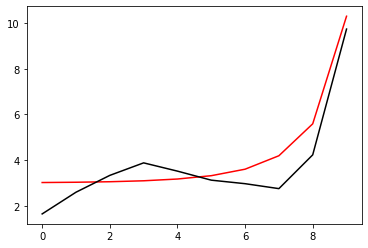

4020 0.04338119211167638 -0.859391708240646 0.8720549144298726
[1.63867328 2.58915988 3.32898792 3.87988231 3.52343402 3.13287031
 2.9841783  2.77418646 4.25969058 9.73708731]


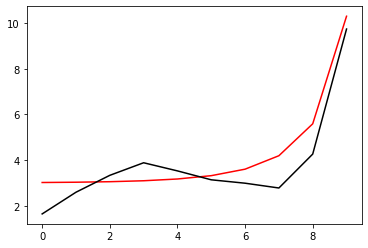

4221 1.0122217047043425 -0.8603683516855164 0.8732427339842478
[1.63766741 2.58818143 3.33073794 3.88456132 3.53375228 3.14862445
 3.0061344  2.80333666 4.29505431 9.73871743]


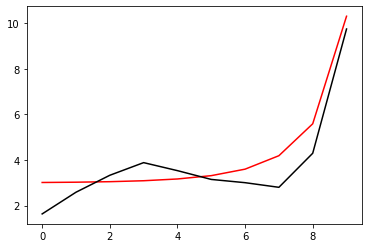

4422 0.015020334789859984 -0.8613755643100598 0.875073387790132
[1.63576781 2.58643693 3.33194623 3.88897988 3.54419975 3.16499396
 3.02934442 2.83454254 4.33330909 9.74047548]


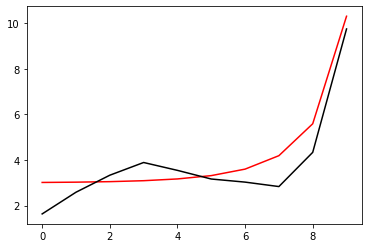

4623 0.004939771894100961 -0.8658893679263951 0.8685996303838067
[1.6455272  2.59751253 3.34693692 3.9080727  3.57000073 3.19723833
 3.06862966 2.88146104 4.38618578 9.7428878 ]


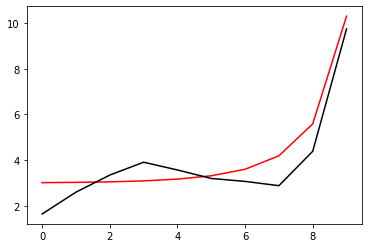

4824 0.007082547158875317 -0.8668052998780124 0.8715915864467239
[1.6398328  2.59435378 3.34874642 3.91519808 3.58510778 3.22041955
 3.10095151 2.9241847  4.43845154 9.74526713]


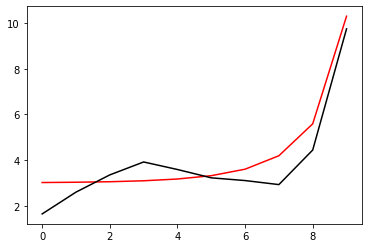

5025 0.014387816024628713 -0.8653194526946277 0.8770839767291532
[1.63100769 2.58530154 3.34166625 3.91029198 3.58475203 3.22449217
 3.11022308 2.9399374  4.46055566 9.74628718]


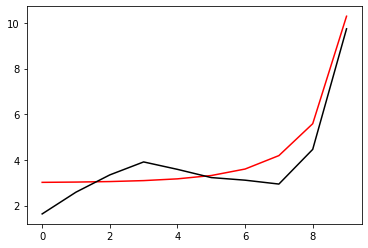

5226 0.014303707927563117 -0.8663138701481482 0.8779843309487537
[1.63016845 2.58448968 3.3432162  3.91448169 3.59411486 3.2389929
 3.13073189 2.96770047 4.49507482 9.74786427]


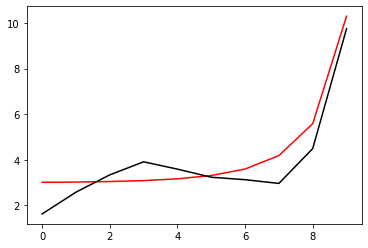

5427 0.011054219213131699 -0.8672254948340055 0.878842982809233
[1.62968341 2.58399803 3.34510907 3.91898198 3.60377284 3.25367571
 3.15122856 2.99519408 4.52899095 9.74941451]


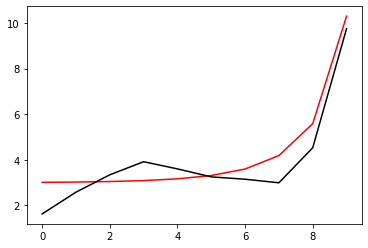

5628 0.013432236517342733 -0.8679923539128528 0.8797492690830048
[1.62948581 2.58374664 3.34725541 3.9236961  3.61362147 3.26843064
 3.17160644 3.02234393 4.56232716 9.75094106]


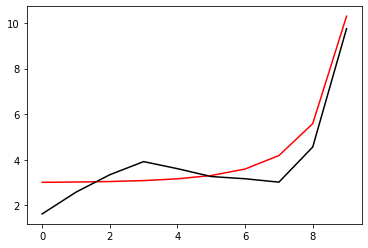

5829 0.01803218801865823 -0.8687437305705951 0.8808099232503364
[1.62912201 2.58328432 3.34922644 3.92824278 3.62335134 3.28305694
 3.19182331 3.04933091 4.59556022 9.75246493]


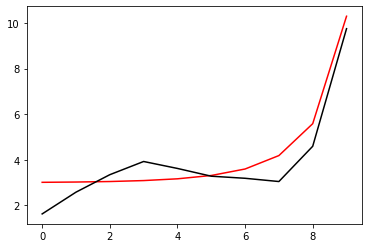

6030 3.0009072891610375 -0.8696388551172198 0.8818646576523927
[1.62867612 2.58263462 3.35099272 3.9325505  3.63285309 3.29742125
 3.21173857 3.07603306 4.62863259 9.75398072]


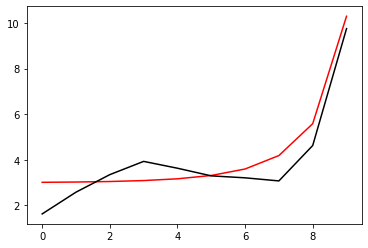

6231 0.01315044803978132 -0.8714409774364316 0.8813864230685581
[1.62987038 2.58305237 3.35330809 3.93682326 3.64171992 3.31043301
 3.2294834  3.09972235 4.65796789 9.75532726]


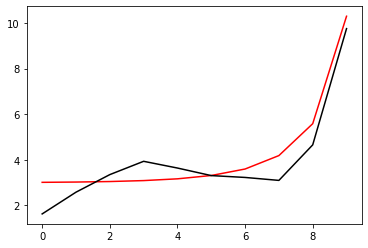

6432 1.011736448515163 -0.8719797791311631 0.8825523186352665
[1.62640838 2.57980043 3.35257448 3.93835786 3.64773547 3.32002339
 3.24262643 3.11699931 4.67865637 9.75627925]


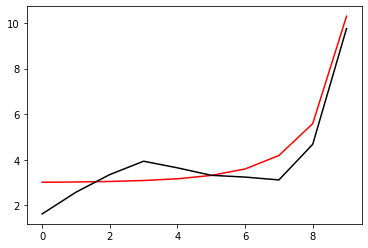

6633 0.010282250773633702 -0.8718327495650783 0.8834863703401185
[1.62609596 2.57956266 3.35453934 3.94238712 3.65597373 3.33176971
 3.25803173 3.1368579  4.70259852 9.75737095]


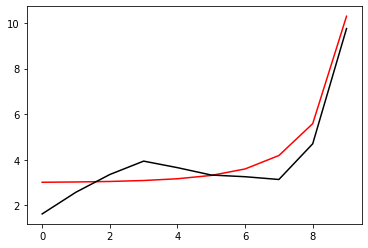

6834 0.007331027219532835 -0.8734968142242994 0.8840221182151806
[1.62220835 2.57592458 3.3531191  3.94309311 3.66084445 3.34017763
 3.27013615 3.15346771 4.72346143 9.75833743]


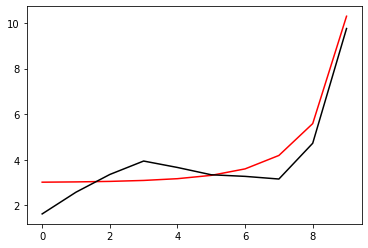

7035 0.012790054505413253 -0.8739293065113135 0.8842519560339535
[1.62208217 2.57579214 3.35477844 3.94642391 3.66774584 3.35002003
 3.28302407 3.17015645 4.74374664 9.75926635]


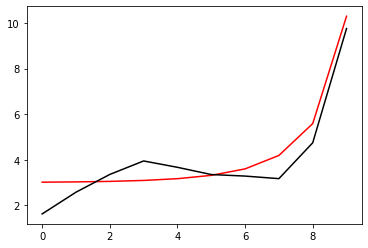

7236 0.006256982509000896 -0.8783216090429841 0.8766980864995593
[1.63621491 2.59056618 3.37197622 3.96597952 3.69158523 3.37764735
 3.31473551 3.20691296 4.78554559 9.76117328]


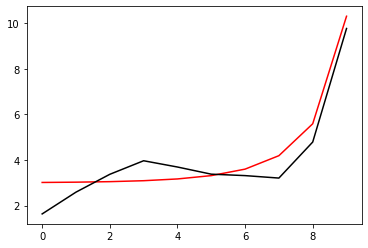

7437 0.0065748515454002445 -0.879544459421199 0.8780243406125535
[1.63276738 2.58762532 3.37156812 3.96820923 3.69862132 3.38919004
 3.33136793 3.230008   4.81565894 9.76254734]


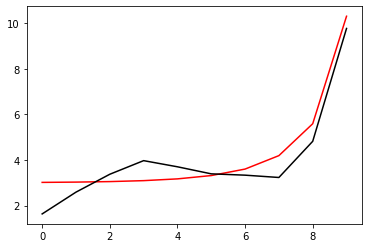

7638 0.8971931429097403 -0.8801733423385625 0.8786995377494002
[1.6323965  2.58802866 3.37476046 3.97419775 3.70950156 3.40450793
 3.35153913 3.25620448 4.84819352 9.7640276 ]


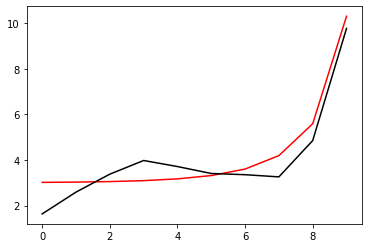

7839 1.0052398126673225 -0.8813328761877792 0.8794344206899094
[1.63048279 2.58708495 3.37685047 3.97930181 3.71972498 3.41933796
 3.37134605 3.28211871 4.8804772  9.76549851]


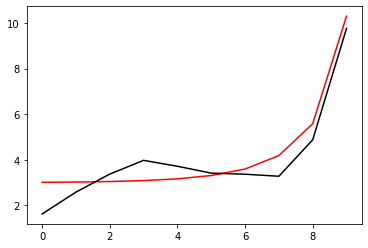

8040 0.005961651498569174 -0.8820995896683028 0.8802254628715191
[1.62911584 2.58699573 3.38009846 3.98579378 3.73151997 3.43580475
 3.39272848 3.30939796 4.91372321 9.76701632]


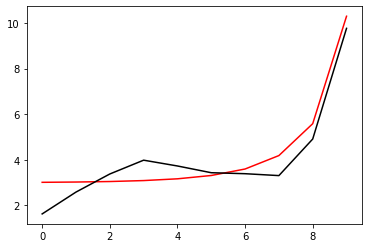

8241 0.005148060139278358 -0.8829339531840402 0.8812919507241429
[1.62669585 2.58614075 3.38290882 3.99215596 3.74350744 3.45273363
 3.41479736 3.33753419 4.94790117 9.76858287]


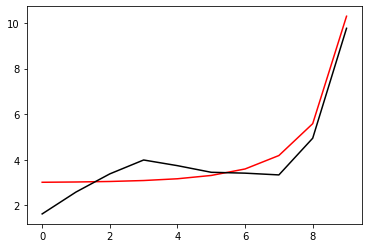

8442 0.005882983450987747 -0.8838300859783014 0.8820283092729516
[1.62502029 2.58612757 3.38669596 3.99962042 3.75674249 3.4710176
 3.43829208 3.36711431 4.983438   9.77021483]


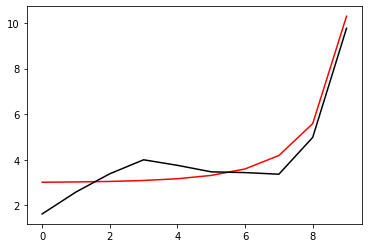

8643 0.005238486878243988 -0.8849229683840519 0.883207933320516
[1.6213535  2.58444719 3.38918494 4.00614993 3.76942975 3.4891015
 3.46189649 3.39705671 5.01947758 9.77187607]


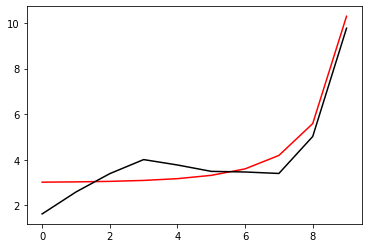

8844 0.005150490442726331 -0.886072768564395 0.8840594536857831
[1.61831124 2.58341851 3.39237285 4.01340832 3.78288084 3.50793117
 3.48616307 3.42748851 5.05569231 9.77354647]


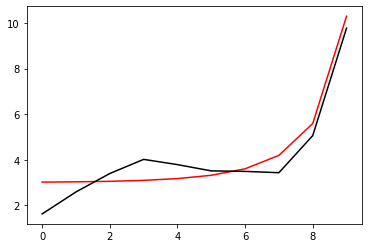

9045 0.0068964238573908255 -0.88613768941439 0.8852552311544996
[1.61946556 2.58560178 3.39802325 4.02262075 3.79805571 3.52857881
 3.51273188 3.46111007 5.09635019 9.77542354]


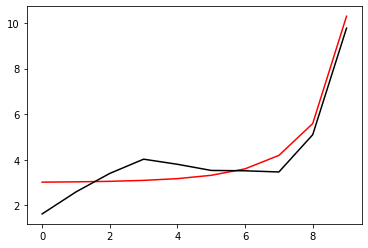

9246 1.0058935704222896 -0.8881263653049557 0.8861451021622487
[1.61418052 2.58184639 3.39815858 4.026659   3.808296   3.54437511
 3.53431952 3.48938094 5.1310255  9.77701702]


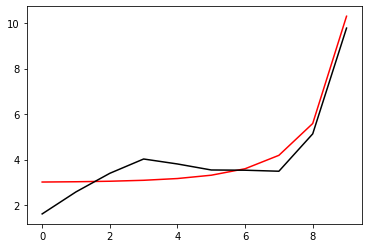

9447 0.21641460964594397 -0.8874814159920523 0.8858032063862687
[1.62186982 2.58990825 3.40893198 4.04009217 3.8266558  3.56697447
 3.56134927 3.52167433 5.16823599 9.77872135]


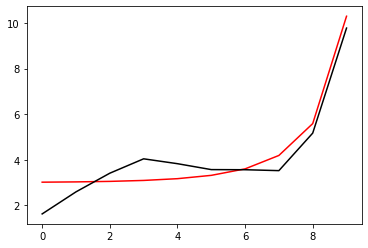

9648 0.012790839890299013 -0.888327190712718 0.8871912652024041
[1.61726469 2.58736977 3.41058221 4.04574717 3.83835348 3.58381207
 3.58321763 3.54908777 5.20054659 9.78019353]


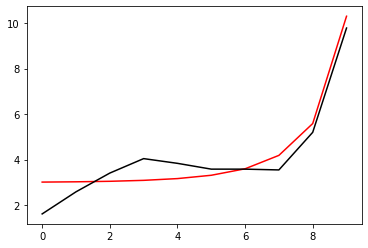

9849 0.006477173961537944 -0.8899423981244583 0.8874684294173129
[1.61396374 2.58506085 3.41145802 4.04973461 3.84758791 3.59758088
 3.60162933 3.57291977 5.22944787 9.78149797]


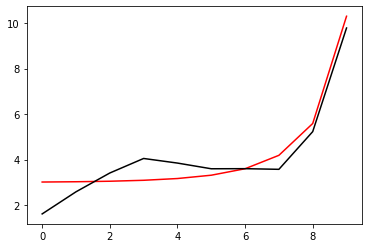

In [216]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%set], Negative[i%set]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 0.005872739415165374 -0.8900940008604402 0.8911186991083047
[1.60909378 2.5787335  3.40976759 4.05258031 3.86002891 3.61788874
 3.63019854 3.61173552 5.27786482 9.78371707]


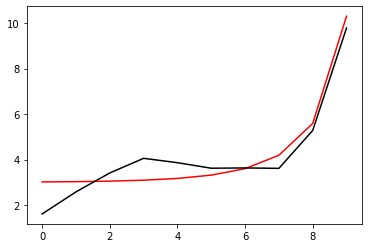

402 0.006163877802440103 -0.8934087682616678 0.8905664842837889
[1.60894848 2.57793709 3.41051828 4.0548399  3.86588369 3.62676515
 3.6423647  3.62827289 5.29893626 9.78465915]


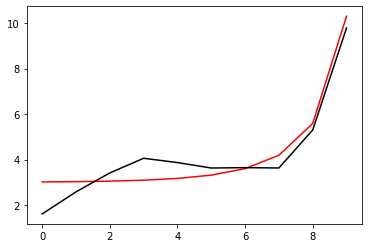

603 0.005565753418146592 -0.891973116518941 0.8939099864603068
[1.60478585 2.57440807 3.40953438 4.05662692 3.87268965 3.63844159
 3.65946379 3.65188421 5.32847387 9.78600021]


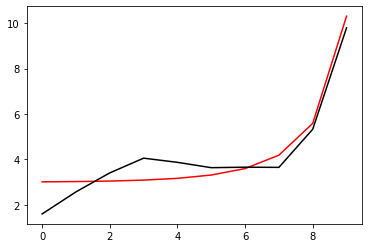

804 0.0053853653595918975 -0.8961241704774515 0.892986457237125
[1.60033105 2.56868356 3.40444874 4.0524955  3.87178227 3.64083267
 3.66597775 3.66400424 5.34634939 9.78682284]


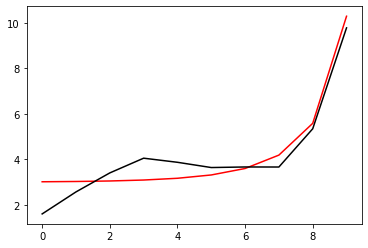

1005 1.0053227773068247 -0.8955113494664814 0.8937938692333116
[1.60184903 2.57023559 3.40771763 4.05776608 3.88109518 3.6541863
 3.68398441 3.68778396 5.37564078 9.78819435]


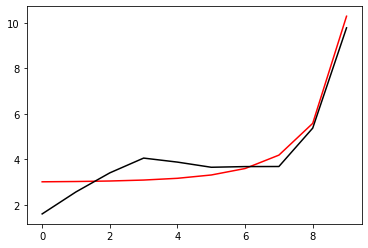

1206 0.008904888806010623 -0.8946143794542936 0.8935679838543314
[1.60673523 2.57569197 3.41530652 4.06771642 3.89535045 3.67267273
 3.70714625 3.71640865 5.40883691 9.78973466]


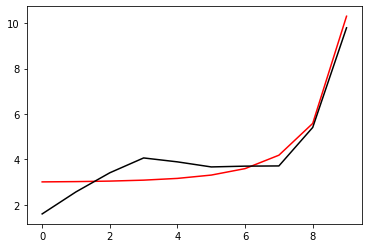

1407 0.006277948357576825 -0.8948233018904249 0.8967833049405813
[1.59833298 2.56682415 3.40757788 4.06148541 3.89274938 3.67402012
 3.71351607 3.72956132 5.42906466 9.79066335]


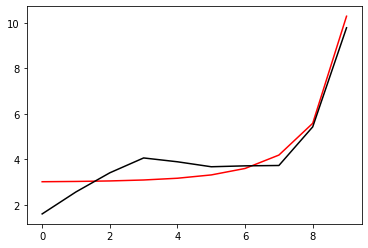

1608 2.007370365081788 -0.8976545966795965 0.8946456353498364
[1.60124023 2.56847205 3.40957989 4.06418615 3.89828361 3.68267891
 3.72631445 3.7481099  5.45333847 9.7917767 ]


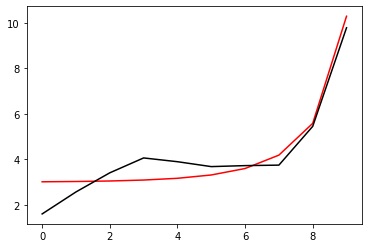

1809 0.005496933336171888 -0.896808612591573 0.8952884148879894
[1.60469292 2.57111679 3.41305668 4.06877934 3.90610648 3.69386741
 3.74169605 3.7690654  5.47958021 9.79296455]


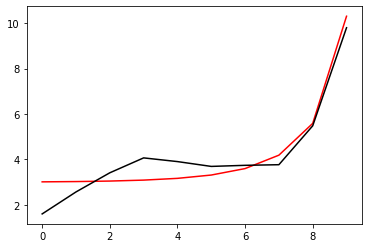

2010 0.00567191944204495 -0.8956957094222224 0.8963881061099088
[1.60738665 2.57277031 3.41530698 4.07186796 3.91211389 3.7028395
 3.75434801 3.7866781  5.50181639 9.79397427]


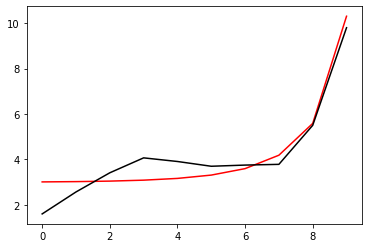

2211 1.0053379520950392 -0.8991761750156007 0.8954268076957661
[1.60495984 2.56997068 3.41399818 4.07258885 3.91733    3.71310035
 3.77103221 3.8117301  5.53524699 9.79549676]


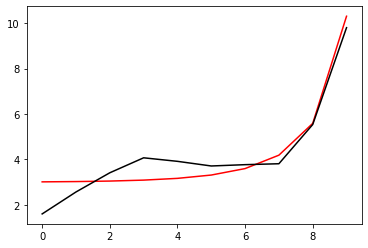

2412 0.6603098443379197 -0.8966391505653086 0.8987618769606085
[1.60429385 2.56754244 3.41140278 4.06992426 3.91652972 3.71398849
 3.77410659 3.8182079  5.54510467 9.79592719]


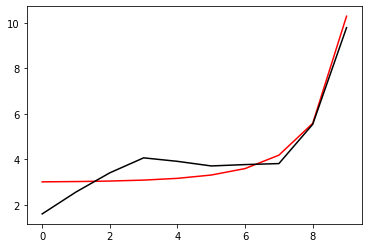

2613 0.006563172814813674 -0.8981030298202112 0.8965263768160797
[1.61144898 2.5738117  3.41834933 4.07781049 3.92738366 3.72790443
 3.79180846 3.84091416 5.57236929 9.79716228]


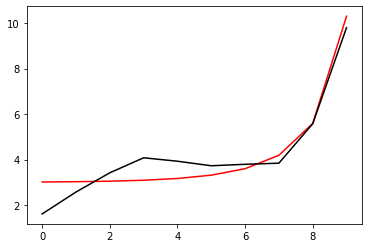

2814 0.009322387448495461 -0.8974523970669732 0.8996586195358112
[1.60680589 2.56745886 3.41191885 4.07159803 3.92349007 3.72652466
 3.79389423 3.84817866 5.58518566 9.7977467 ]


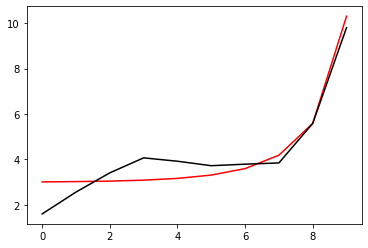

3015 0.008915917399819437 -0.8977848505990521 0.8986974033451333
[1.61241966 2.57170837 3.4162898  4.07628142 3.93042527 3.73572998
 3.80600124 3.86433577 5.60490089 9.79865523]


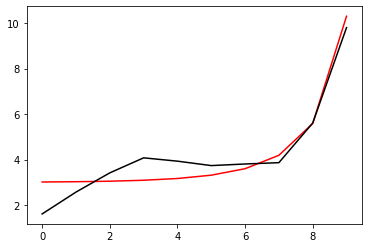

3216 0.6580510368912247 -0.8978473998990144 0.8995390466332908
[1.61280767 2.57129606 3.41671771 4.07787022 3.93532482 3.74416236
 3.81890594 3.88322618 5.62955483 9.79979091]


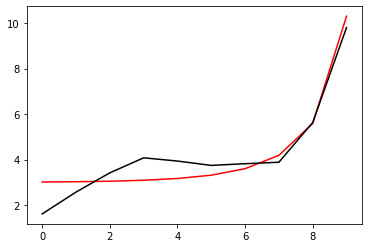

3417 0.009384631989527457 -0.8980602750895585 0.9003534648767505
[1.61315218 2.57081046 3.41712311 4.07949516 3.94036004 3.75280904
 3.83211047 3.90256153 5.65493406 9.8009672 ]


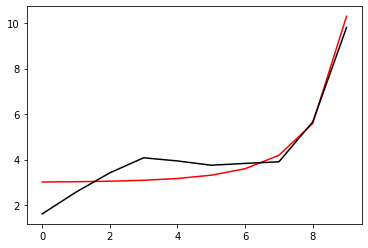

3618 0.010503564446514036 -0.8975583448894985 0.9024229160037828
[1.61166331 2.56845381 3.41569614 4.07931534 3.94363763 3.7596822
 3.84347288 3.91998215 5.67839518 9.80204613]


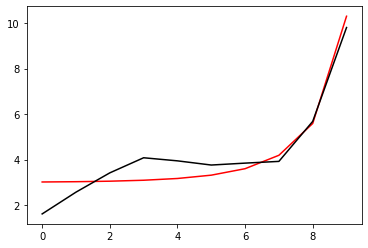

3819 0.005398184265964685 -0.9011717803584125 0.898456804926975
[1.61801776 2.57264443 3.4191706  4.08221434 3.9478069  3.76506236
 3.8506125  3.93007853 5.69127149 9.80267188]


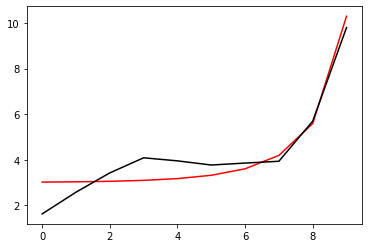

4020 0.006446437958704971 -0.9020297577326819 0.9004700200220472
[1.61286627 2.56642826 3.41353541 4.07753125 3.94624951 3.76696551
 3.85708993 3.94297396 5.71080248 9.80356702]


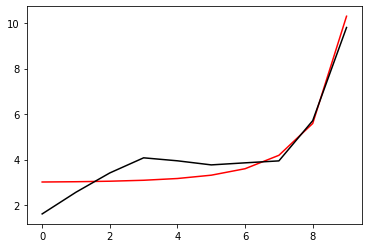

4221 1.0099022648584743 -0.9010971177315007 0.900219175515099
[1.6194211  2.57080812 3.41692407 4.07978708 3.94878991 3.7692324
 3.85892819 3.94483202 5.71205751 9.80363232]


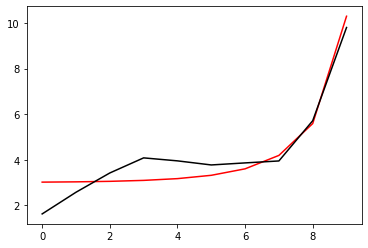

4422 0.005041746676473622 -0.9022158278560422 0.900557609640241
[1.61783791 2.56845006 3.41509924 4.07880413 3.95057451 3.77418068
 3.86813429 3.95997013 5.73287257 9.80457379]


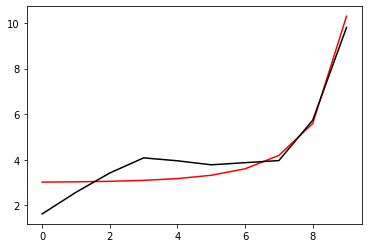

4623 0.0066943866941193775 -0.9018650675661091 0.9018117047515217
[1.61793467 2.56751949 3.41460599 4.07916932 3.95392506 3.78107686
 3.8799008  3.97850593 5.75797083 9.80572033]


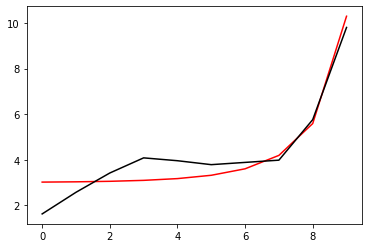

4824 0.0067338798530273926 -0.9019101450152687 0.902871461614509
[1.6177978  2.56639554 3.41401943 4.07953791 3.95741191 3.78820692
 3.89197674 3.99742006 5.78350993 9.80688243]


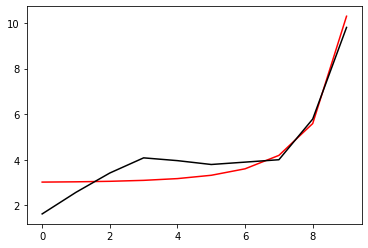

5025 0.012965685569082796 -0.9008388984773927 0.9030563640608681
[1.62215506 2.56937279 3.41659539 4.08162321 3.96027488 3.79143797
 3.89550149 4.00166797 5.78775166 9.8070731 ]


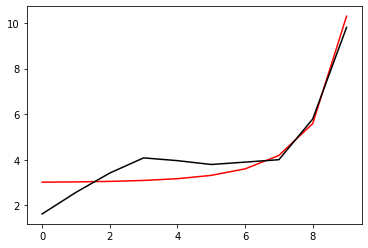

5226 0.009121717107084655 -0.9029003500187874 0.9002742443452579
[1.62839259 2.57445564 3.42165435 4.08683209 3.96725551 3.80032653
 3.9069768  4.01693725 5.80640293 9.80791428]


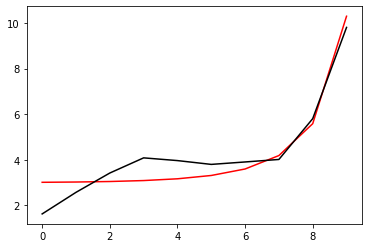

5427 0.010959520698675437 -0.9009228209500915 0.9041751086224411
[1.6240632  2.56881923 3.41598954 4.08146042 3.96408417 3.79986067
 3.91055076 4.02675378 5.82299414 9.80867447]


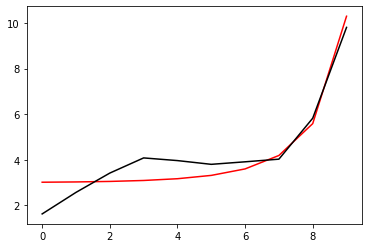

5628 0.018485574642871733 -0.9011353515908733 0.9053208598471689
[1.62337273 2.56684031 3.4141107  4.0800797  3.96525033 3.80418935
 3.9195265  4.04268139 5.84623233 9.809739  ]


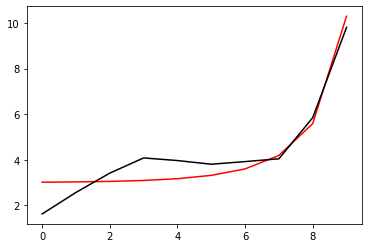

5829 0.01911382996221547 -0.9026642103784513 0.904780494286569
[1.62481963 2.56733653 3.41513645 4.08208971 3.97038415 3.81309582
 3.93369213 4.06427188 5.87517097 9.81109163]


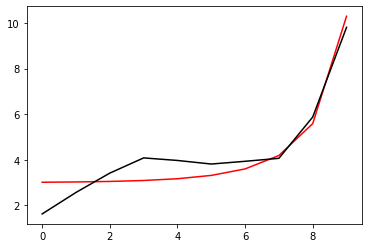

6030 3.002965794774747 -0.9016731576386867 0.9072752089382397
[1.62246917 2.56409051 3.41231332 4.07999475 3.97091934 3.81664576
 3.94136791 4.07787967 5.89444727 9.81195419]


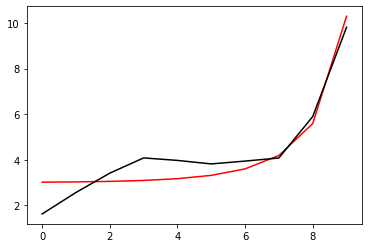

6231 0.00988344027018424 -0.9035308262484282 0.9055474744205689
[1.6258953  2.56684406 3.41581094 4.08460994 3.97872208 3.82814668
 3.95784756 4.10118504 5.92397259 9.81329905]


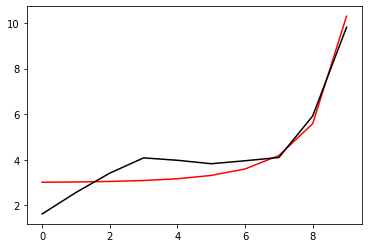

6432 1.0085926262246092 -0.9049717187442818 0.9035046907907318
[1.63108588 2.57105292 3.42045468 4.08998273 3.98683151 3.83933482
 3.97319345 4.12238434 5.95045843 9.81453354]


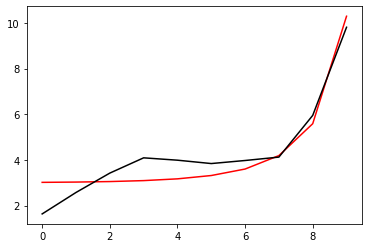

6633 0.007373877832217906 -0.9040062863537124 0.9085112927084003
[1.62278206 2.561095   3.41045871 4.08040529 3.97995239 3.83585657
 3.97488474 4.13214441 5.96908929 9.81538091]


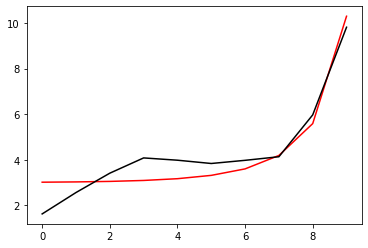

6834 0.005507126534733039 -0.904194591708677 0.9078724010814565
[1.62732194 2.56502263 3.41531715 4.08651447 3.98944953 3.84910165
 3.99301925 4.15689966 5.99967877 9.81679207]


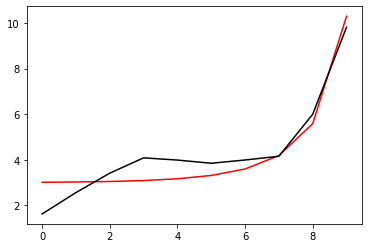

7035 0.026324492537052473 -0.9046022186585242 0.9089387025769752
[1.62633652 2.56258359 3.41290312 4.08438807 3.98962157 3.85181336
 3.99927663 4.16853962 6.01660261 9.81756846]


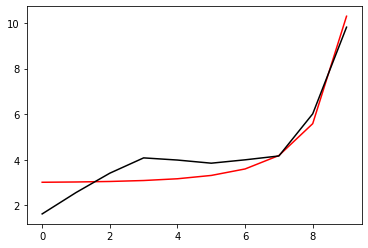

7236 0.005637044488594938 -0.9101326610534891 0.9040862916593165
[1.6308511  2.56512171 3.4148238  4.08598944 3.99288299 3.85715312
 4.00792704 4.18259909 6.0362076  9.81846282]


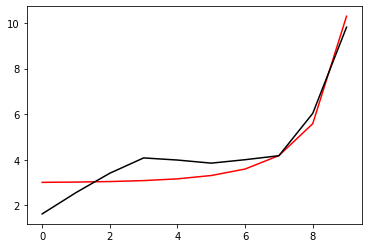

7437 0.032852844970299167 -0.9053780603481386 0.9096401392590538
[1.6296284  2.5624921  3.41213412 4.08360182 3.99280063 3.85993758
 4.01500974 4.19632449 6.05680823 9.81941213]


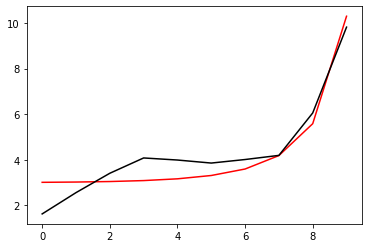

7638 0.09781468890745237 -0.9056435800391016 0.9095806262286982
[1.63239485 2.56367272 3.41304596 4.08450101 3.99560029 3.86497353
 4.02339268 4.20998924 6.07567497 9.82027039]


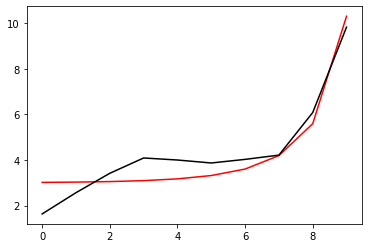

7839 1.005588028684746 -0.9091499896746954 0.9064680521117399
[1.63542657 2.56575378 3.41545    4.0874036  4.00080374 3.87256318
 4.03403421 4.22494564 6.09418081 9.82107601]


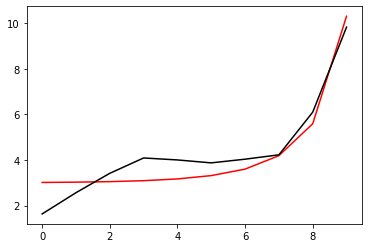

8040 0.004972943849234477 -0.9091664757827439 0.9074904243076
[1.63575319 2.56440342 3.41385987 4.08596266 4.0016657  3.87634189
 4.04225929 4.24002173 6.11613483 9.822102  ]


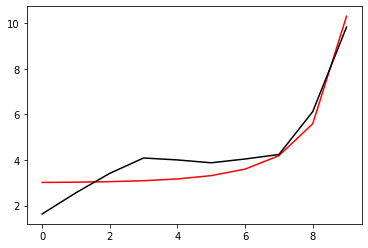

8241 0.0051844918438904665 -0.9103035961689313 0.905790524095022
[1.64115446 2.56779838 3.41658904 4.08819618 4.00528135 3.88144428
 4.04963696 4.25126648 6.1309928  9.82283782]


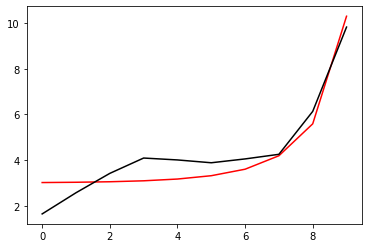

8442 0.007425803210293461 -0.9086431966434376 0.9092827337464414
[1.63733964 2.56259577 3.41134246 4.0830995  4.0022577  3.88066029
 4.05200681 4.25863152 6.14330151 9.82334136]


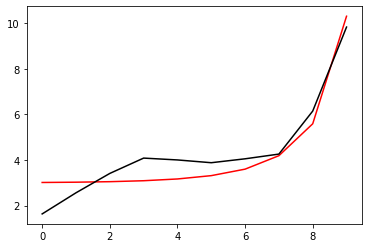

8643 0.007279723750649143 -0.909212537303094 0.9071541951786674
[1.64613567 2.56879059 3.41618313 4.08660675 4.00611649 3.88464089
 4.05640787 4.26458191 6.15041981 9.82379463]


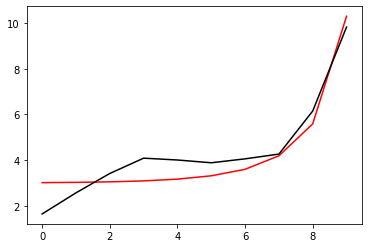

8844 0.005633626668479496 -0.9096099404091943 0.907704364735742
[1.64608962 2.56711712 3.41393806 4.08378921 4.00425155 3.88357286
 4.05653691 4.26720144 6.15538978 9.82390403]


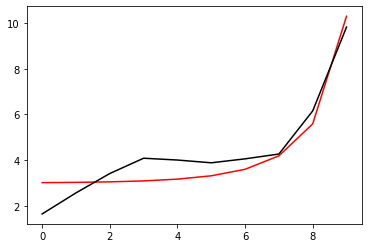

9045 0.007122619040041794 -0.9096571760051702 0.9096231473716904
[1.6431196  2.56199848 3.4079936  4.07732298 3.99927485 3.88060485
 4.05705803 4.27387519 6.16892414 9.82453154]


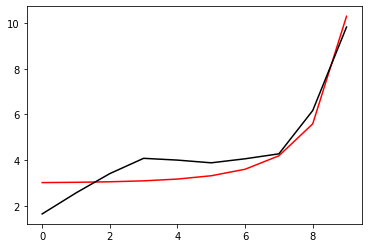

9246 1.0112866240728402 -0.9088345334083545 0.9075688763292675
[1.65427328 2.57099589 3.41557387 4.08312427 4.00417478 3.88359838
 4.05714054 4.27056138 6.1612878  9.82418834]


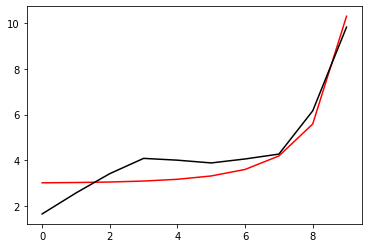

9447 0.048336782294128564 -0.908954658732358 0.9104941289911811
[1.64743554 2.5621329  3.40570219 4.07249052 3.99447595 3.87542338
 4.05206933 4.27154443 6.16977949 9.82457178]


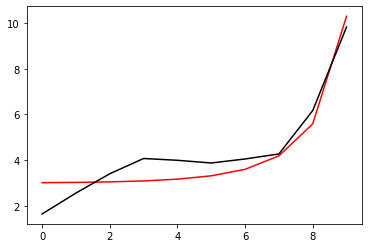

9648 0.02646980394196384 -0.9120836266881454 0.906024747148619
[1.65617613 2.56897695 3.4115847  4.07746181 3.99995415 3.88140155
 4.05906386 4.28084742 6.18121165 9.825102  ]


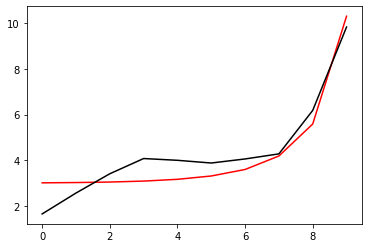

9849 0.0067945916543618754 -0.9110629883988577 0.907370308151464
[1.65678818 2.56849236 3.41106133 4.07710376 4.00144995 3.8850899
 4.06600729 4.29297503 6.19853473 9.82590176]


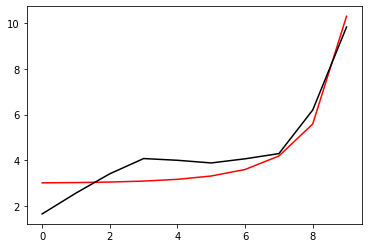

In [217]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%set], Negative[i%set]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 0.006228562719890643 -0.9172363392826853 0.9100322325327398
[1.66945698 2.57517392 3.41573578 4.07989079 4.00685571 3.89292243
 4.07831486 4.32038223 6.23298564 9.82747388]


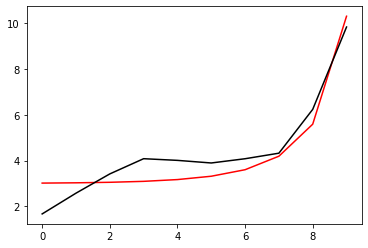

402 0.008016800614688797 -0.9140508920283733 0.9129239769042946
[1.66995317 2.57488614 3.41560713 4.08007279 4.00898063 3.89738297
 4.08631375 4.33377644 6.24969971 9.8282369 ]


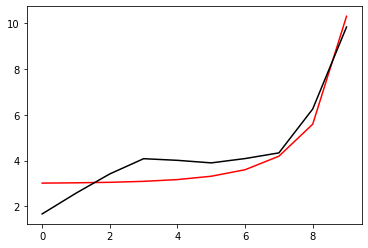

603 0.0050778047351390885 -0.9140763003585556 0.9141292666058689
[1.66849387 2.57096109 3.41012277 4.07294604 4.00152355 3.88933175
 4.07800071 4.32696315 6.24551981 9.82803138]


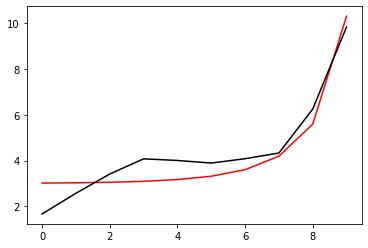

804 0.008063028348142922 -0.913925205851747 0.9143502830477017
[1.67069478 2.57110696 3.40921646 4.07108015 4.00029255 3.88888782
 4.07924384 4.33198619 6.25480783 9.82845724]


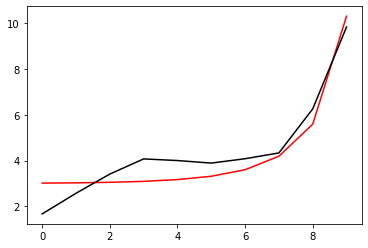

1005 1.006004439369959 -0.9138187410997844 0.9137517281866055
[1.67511218 2.57329562 3.40989963 4.07008769 3.9986514  3.88611883
 4.07517682 4.32735819 6.24974323 9.82823326]


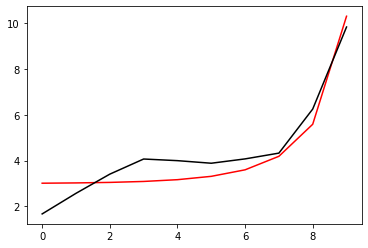

1206 0.008964116357974623 -0.9144185770052825 0.9119919795655188
[1.68226039 2.57856641 3.41407065 4.07315076 4.00185471 3.88939943
 4.07897282 4.33301672 6.25733904 9.82858526]


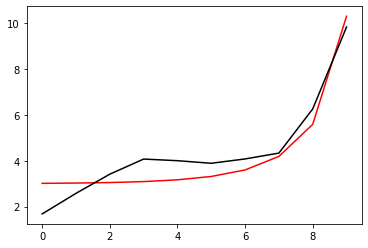

1407 0.005807061806787324 -0.9143012766976006 0.9142651133774605
[1.67686508 2.5712894  3.40582599 4.06403347 3.99336291 3.88174245
 4.07315367 4.33138898 6.2610749  9.8287582 ]


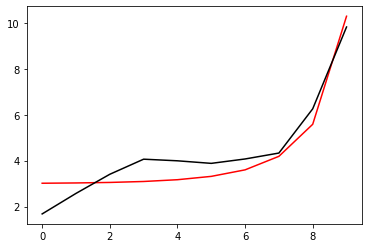

1608 1.990256053515815 -0.9152350213763939 0.9138149033956527
[1.67834801 2.57093315 3.4045225  4.06178971 3.99154932 3.88025446
 4.07241038 4.33279906 6.26487076 9.82892678]


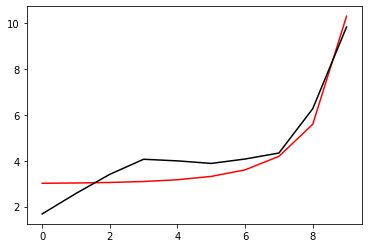

1809 0.004907489277528383 -0.9149693537028671 0.9138705100440501
[1.68186949 2.57240942 3.4048662  4.06108373 3.99124739 3.88044409
 4.07378983 4.33709544 6.27249142 9.82927912]


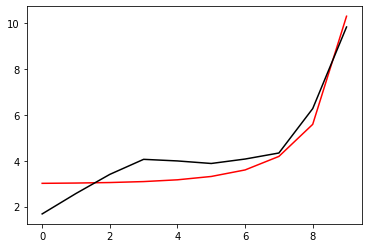

2010 0.005237760017135814 -0.9142725559246385 0.9145187612611229
[1.68413063 2.57261343 3.40393651 4.05911755 3.98974004 3.87955159
 4.07435212 4.34105893 6.28045984 9.82963978]


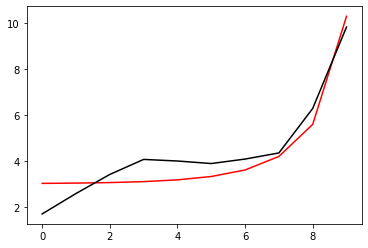

2211 1.0054959958980363 -0.9143769562671995 0.9146371036158908
[1.68563373 2.57195246 3.40188386 4.0555659  3.98580685 3.87486645
 4.06891354 4.33580828 6.2756727  9.82941655]


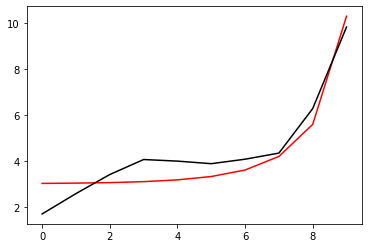

2412 0.6801306134904525 -0.9149091256026317 0.9141961505478928
[1.68872344 2.57286213 3.4014809  4.05393424 3.98432205 3.87362477
 4.06860871 4.33815214 6.28123331 9.82964591]


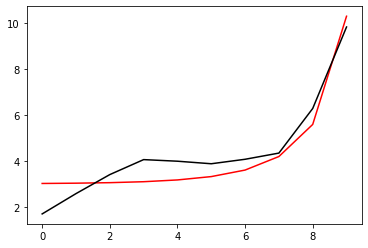

2613 0.013579527843568726 -0.912212300118312 0.9179627341228609
[1.6860551  2.56860154 3.39644586 4.0481977  3.979186   3.86914359
 4.0653724  4.33772162 6.28410414 9.82976476]


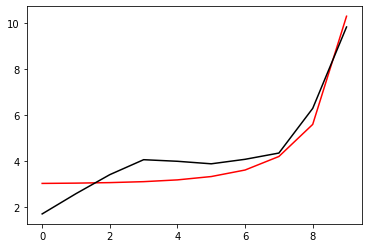

2814 0.008801598433846291 -0.9146954578686405 0.9129017684061603
[1.69752364 2.57998013 3.4082948  4.0604101  3.99257401 3.88321261
 4.07956484 4.35151234 6.29549239 9.83027522]


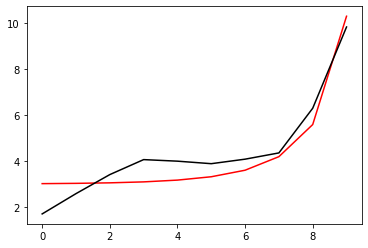

3015 0.006602947742953073 -0.9147443832850869 0.9148157767318151
[1.69275529 2.5737636  3.40136348 4.05286332 3.98566145 3.87714816
 4.07520648 4.3508425  6.29962878 9.83047243]


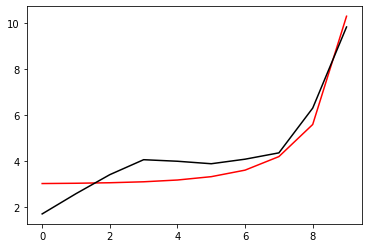

3216 0.825218855932556 -0.9143182711038956 0.9136349253872343
[1.69977603 2.57969602 3.406966   4.05822297 3.99204088 3.88464271
 4.08438237 4.36298821 6.31457054 9.83115833]


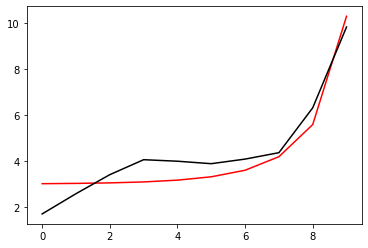

3417 0.007498489748492711 -0.9140012289037417 0.9140552096195649
[1.70181881 2.58015693 3.4066978  4.05741062 3.99212417 3.88596961
 4.08799095 4.37097479 6.32777618 9.83177825]


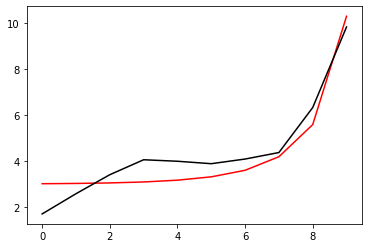

3618 0.01113883331741651 -0.9127745103533323 0.916390120234133
[1.69978795 2.57654936 3.4024054  4.05260938 3.98829276 3.88342173
 4.08775935 4.37525301 6.33766703 9.83222709]


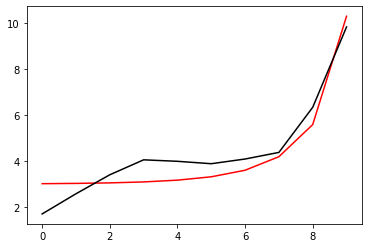

3819 0.007851314797529754 -0.9127171550649353 0.9173825256257476
[1.69923264 2.57405448 3.39889201 4.04820928 3.98447002 3.88034838
 4.08625984 4.37726147 6.34407931 9.83254331]


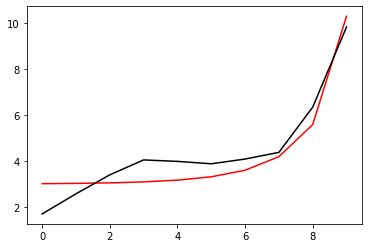

4020 0.0062010006973867845 -0.9123217587729955 0.9179879961032681
[1.70065846 2.57383638 3.39800847 4.0467888  3.98402289 3.8809696
 4.08864273 4.38309699 6.35384968 9.83301194]


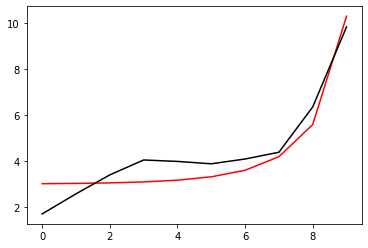

4221 1.048240379944827 -0.9120752131609282 0.9184560720612522
[1.70219572 2.57368977 3.39722256 4.04549322 3.98378465 3.88183785
 4.09126077 4.38910641 6.36366746 9.83348356]


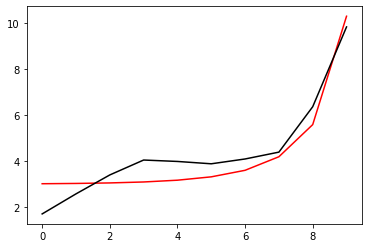

4422 0.013827508425810528 -0.9119943411403107 0.9187901448245395
[1.70384307 2.57356382 3.39643777 4.04418975 3.98359353 3.88278646
 4.09397953 4.39523906 6.37361699 9.83395098]


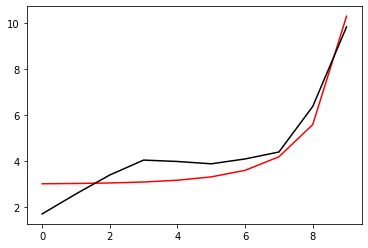

4623 0.01671390702754848 -0.9125706906151682 0.9184066068814764
[1.70625592 2.57392894 3.39593986 4.04299448 3.98340208 3.88364509
 4.09656082 4.40125524 6.38352184 9.8343996 ]


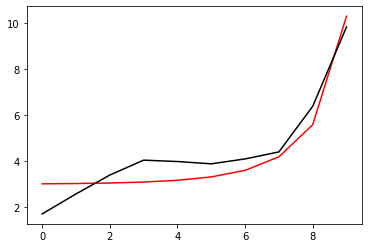

4824 0.024075370424045242 -0.9127200709359102 0.919324720630983
[1.7061222  2.57086706 3.39113641 4.03664172 3.977209   3.87771302
 4.09164742 4.39929405 6.38522317 9.83446894]


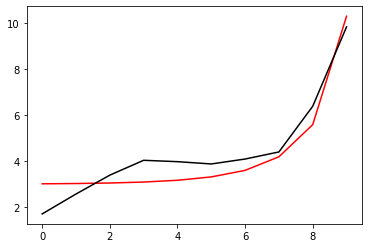

5025 0.040930419295098074 -0.9120449001473275 0.9193361526549402
[1.7103424  2.57343566 3.39316698 4.03826698 3.98009168 3.88186923
 4.09768734 4.40880935 6.3982353  9.83506551]


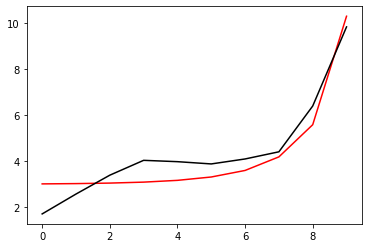

KeyboardInterrupt: 

In [218]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%set], Negative[i%set]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

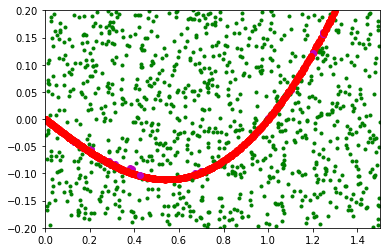

In [ ]:
for i in range (set):
    [Positive0[i], Positive1[i]]=NN_func_01(h, m2_2, lam2, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, m2_2, lam2, Negative[i])
for i in range (set):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()